In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/ExplainIt/explainit/opinion_canonicalization

/content/drive/My Drive/ExplainIt/explainit/opinion_canonicalization


# Open AI

In [ ]:
API_KEY = # TODO: OpenAI API key

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00


In [ ]:
# import openai

from collections import defaultdict

import json
import os

import copy
import time


## Fitering Data (by number of reviews for each hotel)

In [ ]:
# file_path = '/Users/yichenlin/Downloads/amsterdam_hotels/amsterdam_reviews_with_extractions.json'
file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/amsterdam_reviews_with_extractions.json'
with open(file_path, 'r') as file:
    data = json.load(file)

In [ ]:
print('number of reviews: ', len(data))
print('number of unique hotels: ', len(set([review['business_id'] for review in data])))
print(data[0])

number of reviews:  83987
number of unique hotels:  101
{'review_id': 'review_0', 'business_id': 'Hotel Arena', 'text': 'Only the park outside of the hotel was beautiful ', 'extractions': [{'negation': False, 'entity': 'park', 'predicate': 'beautiful', 'attribute': 'building'}]}


In [ ]:
# caluculate number of reviews for each hotl
hotel_number_of_reviews = defaultdict(int)
for review in data:
    hotel_number_of_reviews[review['business_id']] += 1

In [ ]:
# filter to get only hotels with ideal number of reviews
filtered_hotels = [hotel for hotel, number_of_reviews in hotel_number_of_reviews.items() if 400 >= number_of_reviews >= 300]
print('number of unique hotels after filtering: ', len(filtered_hotels))

number of unique hotels after filtering:  9


In [ ]:
filtered_data =  [review for review in data if review['business_id'] in filtered_hotels]
print('number of reviews after filtering: ', len(filtered_data))
print(filtered_data[2])

number of reviews after filtering:  3129
{'review_id': 'review_488343', 'business_id': 'Savoy Hotel Amsterdam', 'text': 'Staff spot on location nicely out of town and good prices Big spacious clean room with immaculate bedding ', 'extractions': [{'negation': False, 'entity': 'prices', 'predicate': 'good', 'attribute': 'value'}, {'negation': False, 'entity': 'bedding', 'predicate': 'immaculate', 'attribute': 'room -> bed'}]}


In [ ]:
print(filtered_data[1])

{'review_id': 'review_488342', 'business_id': 'Savoy Hotel Amsterdam', 'text': 'The hotel is not 4 stars just about 3 stars The first night our room was not available we arrived late and clearly the room had been given to someone else The staff was very rude about the situation and not at all helpful The room we had that night was right by the entrance reception overlooking a main road so was very noisy We were moved the next morning to a better room which was clean basic but had no comforts such as tea coffee facilities The bathroom shower floor was not tiled at all so had to shower in flip flops We asked to speak to a manager about our first night and was told the manager only showed up around 11am 12pm for an hour We waited and the manager did not appear Overall this hotel is fine if you want something basic cheaper than central Amsterdam but still walkable into the city centre The local area bars restaurants park etc make it a much better choice', 'extractions': [{'negation': False

Firmer pillows would have been nice Some parts of the hotel were too dark such as stairwells and corridors Extra lighting would help

### Does not remove reviews with more than 2 opinions (not done)
* had problem match each new sentence with corresponding opinions when review too long (too many sentences and opinions, will get confused)

In [ ]:
# def segment_text(text, api_key):
#     client = openai.OpenAI(
#         api_key=api_key,
#     )
#     prompt = f"Segment the following text into individual sentences and separate each sentence with a '|' symbol. Text: '{text}'"
#     response = client.chat.completions.create(
#         messages=[
#             {
#                 "role": "user",
#                 "content": prompt,
#             }
#         ],
#         model="gpt-3.5-turbo",
#     )
#     return response.choices[0].message.content.strip().split('|')

In [ ]:
# text = final_data[2]['text']
# print(text)
# sentences = segment_text(text, API_KEY)
# print(sentences)

In [ ]:

# def find_best_match(sentence, extractions_copy):
#     matched_extractions = []
#     words_in_sentence = sentence.lower().split(' ')
#     for ext in extractions_copy:
#         # Check if both entity and predicate are in the sentence
#         if ext['entity'].lower() in sentence.lower() and ext['predicate'].lower() in sentence.lower().split(' '):
#             matched_extractions.append(ext)
#             # Remove the extraction from the copy to avoid reusing it
#             extractions_copy.remove(ext)

#     return matched_extractions

# def process_reviews(reviews, api_key):
#     new_dataset = []
#     for review in reviews:
#         sentences = segment_text(review['text'], api_key)
#         # # Make a deep copy of extractions for each review if you expect to run multiple sentences per review
#         # review_extractions = review['extractions'][:]
#         # Create a shallow copy of extractions to modify without affecting the original list
#         extractions = review['extractions']
#         extractions_copy = extractions.copy()
#         for sentence in sentences:
#             if sentence != '':
#               matched_extractions = find_best_match(sentence, extractions_copy)
#               new_dataset.append({
#                   'review_id': review['review_id'],
#                   'business_id': review['business_id'],
#                   'text': sentence.strip(),
#                   'extractions': matched_extractions
#               })
#     return new_dataset


# # Example usage
# # api_key = 'your-api-key'
# reviews = [
#     {'review_id': 'review_401595', 'business_id': 'Sir Albert Hotel', 'text': 'Liked the toiletries the bluetooth speaker radio the general ambience of the hotel Location is fantastic Staff friendly and helpful', 'extractions': [{'negation': False, 'entity': 'toiletries', 'predicate': 'Liked', 'attribute': 'room -> bathroom'}, {'negation': False, 'entity': 'Location', 'predicate': 'fantastic', 'attribute': 'location'}, {'negation': False, 'entity': 'Staff', 'predicate': 'friendly', 'attribute': 'staff'}]},
#     # Add more reviews as needed
# ]

# transformed_data = process_reviews(test_data, API_KEY)


In [ ]:
# test_data = filtered_data[1:2]
# transformed_data = process_reviews(test_data, API_KEY)
# transformed_data

### Remove reviews with more than 2 opinions (not done)

In [ ]:
two_opinons_data = [review for review in filtered_data if len(review['extractions']) == 2]
print('number of reviews after removing reviews with more than 2 opinions: ', len(two_opinons_data))

In [ ]:
# def get_explanation_label(review, api_key):
#     client = openai.OpenAI(
#         api_key=api_key,
#     )

#     sentence = review['text']
#     opinion_a = review['extractions'][0]['predicate'] + ' ' + review['extractions'][0]['entity']
#     opinion_b = review['extractions'][1]['predicate'] + ' ' + review['extractions'][1]['entity']
#     print(sentence, ' | ', opinion_a,' | ', opinion_b)
#     prompt = f"Given the sentence: '{sentence}', where Opinion A is '{opinion_a}' and Opinion B is '{opinion_b}', does Opinion B explain Opinion A based on the context of the sentence? Answer with '1' for yes and '0' for no."

#     response = client.chat.completions.create(
#         messages=[
#             {
#                 "role": "user",
#                 "content": prompt,
#             }
#         ],
#         model="gpt-3.5-turbo",
#     )
#     return response.choices[0].message.content

## Extract sentences

In [ ]:
! pip install tqdm

In [ ]:
import asyncio
import aiohttp
import time
from tqdm import tqdm

### without async

In [ ]:
# def extract_sentences(review, api_key):
#     client = openai.OpenAI(
#         api_key=api_key,
#     )

#     single_review = review['text']

#     prompt = f'''
#     Read the following review: '{single_review}'. Accurately identify and separate each sentence in the review.
#     Present the identified sentences as a JSON array, where each item in the array represents a separate sentence identified within the review.

#     Example input:
#     "Shower head was too low and need low flow nozzles The location was good considering San Francisco has a few very seedy and dodgy areas"

#     Expected output:
#     [
#         "Shower head was too low and need low flow nozzles",
#         "The location was good considering San Francisco has a few very seedy and dodgy areas"
#     ]

#     Example input:
#     "The location was really good walking distance to the main union square hub and transport system The room is quite smal and has a foul smell"

#     Expected output:
#     [
#         "The location was really good walking distance to the main union square hub and transport system",
#         "The room is quite smal and has a foul smell"
#     ]

#     Example input:
#     "The king size bed was very comfortable with plenty of pillows"

#     Expected output:
#     [
#         "The king size bed was very comfortable with plenty of pillows"
#     ]

#     Just return the JSON array. Do not include extra texts.
#     '''

#     response = client.chat.completions.create(
#         messages=[
#             {
#                 "role": "user",
#                 "content": prompt,
#             }
#         ],
#         model="gpt-3.5-turbo",
#     )

#     if response.choices[0].message.content:
#         return response.choices[0].message.content.replace('\n', '')
#     else:
#         return '[]'

In [ ]:
# start_time = time.time()
# for i, review in tqdm(enumerate(filtered_data), total=len(filtered_data)):
#     try:
#         sentences = extract_sentences(review, API_KEY)
#         sentences = json.loads(sentences)

#         for sentence in sentences:
#             sentencess_extracted_data.append(
#                 {
#                 'review_id': review['review_id'],
#                 'business_id': review['business_id'],
#                 'text':sentence,
#                 'extractions': []
#                 }
#         )

#     except json.JSONDecodeError as e:
#         print(f"Failed to decode JSON for review at index {i}: {e}")
#         print(sentences)
#         print()
#     except Exception as e:
#         print(f"An error occurred while extracting sentences for review at index {i}: {e}")
#         print(sentences)
#         print()


# end_time = time.time()  # End timing
# execution_time = end_time - start_time  # Calculate the total execution time in seconds

# # Convert seconds to hour, minute, second format
# hours, remainder = divmod(execution_time, 3600)
# minutes, seconds = divmod(remainder, 60)

# # Print the execution time in a formatted string
# print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

 10%|▉         | 905/9306 [2:07:37<24:12:02, 10.37s/it]

Failed to decode JSON for review at index 904: Extra data: line 1 column 809 (char 808)
[    "I have to say that the only thing that l didn t like was brekfast It is advertised as a lot of healthy options etc and l was looking forward to it but it was pretty basic and dry Some bread and cheese waffles butter There was nothing green like salad tomatoes cucumbers no mayo or red sauce There was nothing available from kichen things like omelette fried egg porridge etc The only healthy thing available was two types of smoothies but they were constantly running out Coffee wasnt great not bad but not good The staff and service at the brekfast was very slow tables were not cleaned quick enough to allow new people to be seated coffee machine was breaking up running out of food Generally people looked frustrated as they had to wait to find a clean table and queue to get some coffee etc If..."],    "l would stay there again l woud not pay for brekfast as it not my type of brekfast at all The hote

 66%|██████▌   | 6098/9306 [14:35:18<7:53:03,  8.85s/it]

### with async

In [ ]:
! pip install nest_asyncio

In [ ]:
! pip install aiolimiter

In [ ]:
import random
import aiohttp
import asyncio
import json
import nest_asyncio
import time
from tqdm.notebook import tqdm
from aiolimiter import AsyncLimiter

# Patch the existing event loop for compatibility with Jupyter/Colab
nest_asyncio.apply()

# Set up a rate limiter. Assuming the limit is 100 requests per minute, for example.
# You should adjust the rate based on the actual limits of the OpenAI API.
rate_limiter = AsyncLimiter(5, 60)

# Asynchronous function to fetch data from the API
async def sentence_fetch(session, review, API_KEY, limiter):
    url = "https://api.openai.com/v1/chat/completions"  # OpenAI API endpoint
    single_review = review['text']
    prompt = f'''
        Read the following review: '{single_review}'. Accurately identify and separate each sentence in the review.
        Present the identified sentences as a JSON array, where each item in the array represents a separate sentence identified within the review.

        Example input:
        "Shower head was too low and need low flow nozzles The location was good considering San Francisco has a few very seedy and dodgy areas"

        Expected output:
        [
            "Shower head was too low and need low flow nozzles",
            "The location was good considering San Francisco has a few very seedy and dodgy areas"
        ]

        Example input:
        "The location was really good walking distance to the main union square hub and transport system The room is quite small and has a foul smell"

        Expected output:
        [
            "The location was really good walking distance to the main union square hub and transport system",
            "The room is quite small and has a foul smell"
        ]

        Example input:
        "The king size bed was very comfortable with plenty of pillows"

        Expected output:
        [
            "The king size bed was very comfortable with plenty of pillows"
        ]

        Just return the JSON array. Do not include extra texts.
    '''
    params = {
        "model": "gpt-3.5-turbo",
        "messages": [
            {
                "role": "user",
                "content": prompt,
            }
        ],
        "temperature": 0.2
    }
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }
    # Use the rate limiter before making a request
    async with limiter:
      # print(f"Requesting at {time.strftime('%X')}")
      async with session.post(url, json=params, headers=headers) as response:
          response_text = await response.text()
          # print(f"Received response at {time.strftime('%X')}")
          return review, response_text

# Asynchronous function to process a batch of reviews
async def process_reviews(filtered_data, API_KEY, limiter):
    async with aiohttp.ClientSession() as session:
        tasks = []
        for review in filtered_data:
            task = asyncio.create_task(sentence_fetch(session, review, API_KEY, limiter))
            tasks.append(task)

        sentences_extracted_data = []
        for i, task in enumerate(tqdm(asyncio.as_completed(tasks), total=len(tasks))):
            review, sentences = await task
            try:
                response_json = json.loads(sentences)
                sentences_str = response_json['choices'][0]['message']['content'].replace('\n', '')
                sentences_json = json.loads(sentences_str)
                for sentence in sentences_json:
                    sentences_extracted_data.append({
                        'review_id': review['review_id'],
                        'business_id': review['business_id'],
                        'text': sentence,
                    })
            except json.JSONDecodeError as e:
                print(f"Failed to decode JSON for review_id {review['review_id']}: {e}")
                print(response_json)
                print()
            except Exception as e:
                print(f"An error occurred while extracting sentences for review_id  {review['review_id']}: {e}")
                print(response_json)
                print()

            if i != 0 and i % 100 == 0:
                wait_min = random.choice([1, 3])
                print(f"Index {i} waiting for {wait_min} minutes...")
                await asyncio.sleep(wait_min * 60)
        return sentences_extracted_data

# # Main coroutine that handles the entire processing
# async def sentence_main():
#     sentences_extracted_data = await process_reviews(filtered_data[1:3], API_KEY, rate_limiter)
#     return sentences_extracted_data

# # Run the main coroutine and measure the execution time
# loop = asyncio.get_event_loop()
# start_time = loop.time()
# sentences_extracted_data = loop.run_until_complete(sentence_main())
# end_time = loop.time()

# # Calculate and print execution time
# execution_time = end_time - start_time
# hours, remainder = divmod(execution_time, 3600)
# minutes, seconds = divmod(remainder, 60)
# print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

In [ ]:
# Main coroutine that handles the entire processing
async def sentence_main():
    sentences_extracted_data = await process_reviews(filtered_data, API_KEY, rate_limiter)
    return sentences_extracted_data

# Run the main coroutine and measure the execution time
loop = asyncio.get_event_loop()
start_time = loop.time()
sentences_extracted_data = loop.run_until_complete(sentence_main())
end_time = loop.time()

# Calculate and print execution time
execution_time = end_time - start_time
hours, remainder = divmod(execution_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

  0%|          | 0/3129 [00:00<?, ?it/s]

An error occurred while extracting sentences for review_id  review_488341: 'choices'
{'error': {'message': 'Rate limit reached for gpt-3.5-turbo in organization org-ofABaOXkeWS2fI3qk4Pf04NW on requests per day (RPD): Limit 10000, Used 10000, Requested 1. Please try again in 8.64s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'requests', 'param': None, 'code': 'rate_limit_exceeded'}}

An error occurred while extracting sentences for review_id  review_488344: 'choices'
{'error': {'message': 'Rate limit reached for gpt-3.5-turbo in organization org-ofABaOXkeWS2fI3qk4Pf04NW on requests per day (RPD): Limit 10000, Used 10000, Requested 1. Please try again in 8.64s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'requests', 'param': None, 'code': 'rate_limit_exceeded'}}

An error occurred while extracting sentences for review_id  review_488343: 'choices'
{'error': {'message': 'Rate limit reached for gpt-3.5-turbo in organizati

KeyboardInterrupt: 

In [ ]:
print('number of reviews: ', len(filtered_data))
print('number of extracted sentences', len(sentences_extracted_data))

number of reviews:  3129
number of extracted sentences 2271


In [ ]:
print('number of extracted sentences', len(sentences_extracted_data))

number of extracted sentences 2271


In [ ]:
# # save file
# file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/GPT_sentences_extracted_data.json'
# with open(file_path, 'w') as file:
#      json.dump(sentences_extracted_data, file)

## Extract Opinions

In [ ]:
###SPACIOUS CLEAN BED



# save file
file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/GPT_sentences_extracted_data.json'
with open(file_path, 'r') as file:
     sentences_extracted_data = json.load(file)

print('number of extracted sentences', len(sentences_extracted_data))

number of extracted sentences 2271


In [ ]:
from collections import Counter
Counter([i['business_id'] for i in sentences_extracted_data])

Counter({'Luxury Suites Amsterdam': 242,
         'Savoy Hotel Amsterdam': 381,
         'Albus Hotel Amsterdam City Centre': 196,
         'Andaz Amsterdam Prinsengracht A Hyatt Hotel': 217,
         'W Amsterdam': 254,
         'NH Amsterdam Museum Quarter': 285,
         'NH Amsterdam Zuid': 200,
         'NH Amsterdam Caransa': 234,
         'Crowne Plaza Amsterdam South': 262})

In [ ]:
new_sentences_extracted_data = [i for i in sentences_extracted_data if i['business_id'] in ['Savoy Hotel Amsterdam', 'Crowne Plaza Amsterdam South', 'NH Amsterdam Museum Quarter']]
print(len(new_sentences_extracted_data))

928


In [ ]:
# Patch the existing event loop for compatibility with Jupyter/Colab
nest_asyncio.apply()

# Set up a rate limiter. Assuming the limit is 100 requests per minute, for example.
# You should adjust the rate based on the actual limits of the OpenAI API.
rate_limiter = AsyncLimiter(5, 60)

# Asynchronous function to fetch data from the API
async def opinion_fetch(session, review, API_KEY, limiter):
    url = "https://api.openai.com/v1/chat/completions"  # OpenAI API endpoint
    single_review = review['text']
    prompt = f'''
        Focus on extracting opinions from a customer review on a hotel.
        An opinion is of the form (predicate, entity). Each opinion should be clear, understandable, and accurately reflects the content of the review.
        Follow these steps to process a single review:
        Step 1: Read the following review: '{single_review}'.
        Step 2: For each review, identify all opinions that are about the hotel.
                1. Each opinion should consist of an adjective "predicate" and an noun "entity". The entity should be words included in the sentence.
                2. The predicate should ONLY CONTAIN ADJECTIVE specifically used to describe the entity.
                3. The entity should be a concise noun or noun phrase that is included in the sentence that directly identifies the primary feature or service being discussed.
                4. The entity should be  be something general, avoiding specific details like names or unique offerings.
                5. Concatenate the predicate and entity to form a single, concise opinion that is clear, understandable, and accurately reflects the content of the review.
                6. For example, from the sentence "The beds are incredibly comfortable" extract "incredibly comfortable" as the predicate and "beds" as the entity. The final opinion should be "incredibly comfortable beds".
        Step 3: Assign a sentiment value to each opinion where "1" indicates positive, "0" indicates neutral, and "-1" indicates negative.
        Step 4: Present your findings in a structured JSON format. The format should list all extracted opinions.

        Example input:
        "The breakfast was excellent"

        Expected ouput:
        [
            {{"predicate": "excellent", "entity": "breakfast", "sentiment": 1}}
        ]

        Example input:
        "The king size bed was very comfortable with plenty of pillows"

        Expected output:
        [
            {{"predicate": "very comfortable", "entity": "bed", "sentiment": 1}},
            {{"predicate": "plenty", "entity": "pillows", "sentiment": 1}}
        ]

        Example input:
        "The room is quite small and has a foul smell"

        Expected output:
        [
            {{"predicate": "quite small", "entity": "room size", "sentiment": -1}},
            {{"predicate": "foul", "entity": "smell", "sentiment": -1}},
        ]

        Example input:
        "Toilet and shower doors barely close all the way little privacy if there is someone else in the room"

        Expected output:
        [
            {{"predicate": "barely closed", "entity": "toilet doors", "sentiment": -1}},
            {{"predicate": "barely closed", "entity": "shower doors", 'sentiment': -1}},
            {{"predicate": "little privacy", "entity": "room", "sentiment": -1}}
        ]

        If no opinons identified in the review, return [].
        Just return the JSON array. Do not include extra texts.
    '''
    params = {
        "model": "gpt-3.5-turbo",
        "messages": [
            {
                "role": "user",
                "content": prompt,
            }
        ],
        "temperature": 0.2,
        "max_tokens": 150
    }
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }
    # Use the rate limiter before making a request
    async with limiter:
      # print(f"Requesting at {time.strftime('%X')}")
      async with session.post(url, json=params, headers=headers) as response:
          response_text = await response.text()
          # print(f"Received response at {time.strftime('%X')}")
          return review, response_text

# Asynchronous function to process a batch of reviews
async def process_sentences(sentences_extracted_data, API_KEY, limiter):
    async with aiohttp.ClientSession() as session:
        tasks = []
        for review in sentences_extracted_data:
            task = asyncio.create_task(opinion_fetch(session, review, API_KEY, limiter))
            tasks.append(task)

        opinions_extracted_data = []
        for i, task in enumerate(tqdm(asyncio.as_completed(tasks), total=len(tasks))):
            review, sentences = await task
            try:
                response_json = json.loads(sentences)
                opinions_str = response_json['choices'][0]['message']['content'].replace('\n', '')
                opinions_json = json.loads(opinions_str)

                opinions_extracted_data.append({
                    'review_id': review['review_id'],
                    'business_id': review['business_id'],
                    'text': review['text'],
                    'extractions':opinions_json
                })
            except json.JSONDecodeError as e:
                print(f"Failed to decode JSON for review_id {review['review_id']}: {e}")
                print(response_json)
                print()
                opinions_extracted_data.append({
                    'review_id': review['review_id'],
                    'business_id': review['business_id'],
                    'text': review['text'],
                    'extractions': []
                })
            except Exception as e:
                print(f"An error occurred while extracting sentences for review_id  {review['review_id']}: {e}")
                print(review['text'])
                print(response_json)
                print()


            if i != 0 and i % 100 == 0:
                wait_min = random.choice([1, 3])
                print(f"Index {i} waiting for {wait_min} minutes...")
                await asyncio.sleep(wait_min * 60)
        return opinions_extracted_data

# # Main coroutine that handles the entire processing
# async def opinion_main():
#     opinions_extracted_data = await process_sentences(sentences_extracted_data[2:3], API_KEY, rate_limiter)
#     return opinions_extracted_data

# # Run the main coroutine and measure the execution time
# loop = asyncio.get_event_loop()
# start_time = loop.time()
# opinions_extracted_data = loop.run_until_complete(opinion_main())
# end_time = loop.time()

# # Calculate and print execution time
# execution_time = end_time - start_time
# hours, remainder = divmod(execution_time, 3600)
# minutes, seconds = divmod(remainder, 60)
# print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

In [ ]:
AN_API_KEY = # put OpenAI key

In [ ]:
# Main coroutine that handles the entire processing
async def opinion_main():
    opinions_extracted_data = await process_sentences(new_sentences_extracted_data[1:2], AN_API_KEY, rate_limiter)
    return opinions_extracted_data

# Run the main coroutine and measure the execution time
loop = asyncio.get_event_loop()
start_time = loop.time()
opinions_extracted_data = loop.run_until_complete(opinion_main())
end_time = loop.time()

# Calculate and print execution time
execution_time = end_time - start_time
hours, remainder = divmod(execution_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while extracting sentences for review_id  review_488634: 'choices'
{'error': {'message': 'Rate limit reached for gpt-3.5-turbo in organization org-ofABaOXkeWS2fI3qk4Pf04NW on requests per day (RPD): Limit 10000, Used 10000, Requested 1. Please try again in 8.64s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'requests', 'param': None, 'code': 'rate_limit_exceeded'}}

Failed to decode JSON for review_id review_488555: Unterminated string starting at: line 1 column 495 (char 494)
{'id': 'chatcmpl-9JFb5up3PWoeGafNti7vPGannO3Vb', 'object': 'chat.completion', 'created': 1714375215, 'model': 'gpt-3.5-turbo-0125', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '[\n    {"predicate": "Very good", "entity": "location", "sentiment": 1},\n    {"predicate": "convenient", "entity": "tram ride to Centraal Station", "sentiment": 1},\n    {"predicate": "Excellent", "entity": "comfortable beds", "sentiment": 1},\n    {"predicate": 

KeyboardInterrupt: 

In [ ]:
opinions_extracted_data

[{'review_id': 'review_488342',
  'business_id': 'Savoy Hotel Amsterdam',
  'text': 'The bathroom shower floor was not tiled at all so had to shower in flip flops',
  'extractions': [{'predicate': 'not tiled',
    'entity': 'shower floor',
    'sentiment': -1},
   {'predicate': 'had to shower in flip flops',
    'entity': 'shower',
    'sentiment': -1}]}]

In [ ]:
print('number of extracted sentences', len(opinions_extracted_data))

number of extracted sentences 19


In [ ]:
# save file
file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/GPT_opinions_extracted_data.json'
with open(file_path, 'w') as file:
     json.dump(opinions_extracted_data, file)

### without async

In [ ]:
import copy
import time

In [ ]:
def extract_opinions(review, api_key):
    client = openai.OpenAI(
        api_key=api_key,
    )

    single_review = review['text']

    prompt = f'''
       Focus on extracting opinions from a customer review on a hotel.
        An opinion is of the form (predicate, entity). Each opinion should be clear, understandable, and accurately reflects the content of the review.
        Follow these steps to process a single review:
        Step 1: Read the following review: '{single_review}'.
        Step 2: For each review, identify all opinions that are about the hotel.
                1. Each opinion should consist of an adjective "predicate" and an noun "entity". The entity should be words included in the sentence.
                2. The predicate should ONLY CONTAIN ADJECTIVE specifically used to describe the entity.
                3. The entity should be a concise noun or noun phrase that is included in the sentence that directly identifies the primary feature or service being discussed.
                4. The entity should be  be something general, avoiding specific details like names or unique offerings.
                5. Concatenate the predicate and entity to form a single, concise opinion that is clear, understandable, and accurately reflects the content of the review.
                6. For example, from the sentence "The beds are incredibly comfortable" extract "incredibly comfortable" as the predicate and "beds" as the entity. The final opinion should be "incredibly comfortable beds".
        Step 3: Assign a sentiment value to each opinion where "1" indicates positive, "0" indicates neutral, and "-1" indicates negative.
        Step 4: Present your findings in a structured JSON format. The format should list all extracted opinions.

        Example input:
        "The breakfast was excellent"

        Expected ouput:
        [
            {{"predicate": "excellent", "entity": "breakfast", "sentiment": 1}}
        ]

        Example input:
        "The king size bed was very comfortable with plenty of pillows"

        Expected output:
        [
            {{"predicate": "very comfortable", "entity": "bed", "sentiment": 1}},
            {{"predicate": "plenty", "entity": "pillows", "sentiment": 1}}
        ]

        Example input:
        "The room is quite small and has a foul smell"

        Expected output:
        [
            {{"predicate": "quite small", "entity": "room size", "sentiment": -1}},
            {{"predicate": "foul", "entity": "smell", "sentiment": -1}},
        ]

        Example input:
        "Toilet and shower doors barely close all the way little privacy if there is someone else in the room"

        Expected output:
        [
            {{"predicate": "barely closed", "entity": "toilet doors", "sentiment": -1}},
            {{"predicate": "barely closed", "entity": "shower doors", 'sentiment': -1}},
            {{"predicate": "little privacy", "entity": "room", "sentiment": -1}}
        ]

        If no opinons identified in the review, return [].
        Just return the JSON array. Do not include extra texts.
    '''

    response = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="gpt-3.5-turbo",
        temperature=0.2,
        max_tokens=500
    )

    if response.choices[0].message.content:
        return response.choices[0].message.content.replace('\n', '')
    else:
        return '[]'
    return response.choices[0].message.content.replace('\n', '')

In [ ]:
print(len(new_sentences_extracted_data))
opinions_extracted_data = copy.deepcopy(new_sentences_extracted_data)

928


In [ ]:
start_time = time.time()
for i, review in enumerate(tqdm(opinions_extracted_data, total=len(opinions_extracted_data))):
    try:
        opinions = extract_opinions(review, AN_API_KEY)
        opinions = json.loads(opinions)
        review['extractions'] = opinions
    except json.JSONDecodeError as e:
        print(f"Failed to decode JSON for review at index {i}: {e}")
        print(opinions)
        review['extractions'] = []  # Assume no opinions could be extracted if there's a JSON error
    except Exception as e:
        print(f"An error occurred while extracting opinions for review at index {i}: {e}")
        print(opinions)
        review['extractions'] = []  # General error handling, assume no opinions if error occurs

    if i != 0 and i % 30 == 0:
        wait_min = random.choice([1, 2])
        print(f"Index {i} waiting for {wait_min} minutes...")
        time.sleep(wait_min*60)

end_time = time.time()  # End timing
execution_time = end_time - start_time  # Calculate the total execution time in seconds

# Convert seconds to hour, minute, second format
hours, remainder = divmod(execution_time, 3600)
minutes, seconds = divmod(remainder, 60)

# Print the execution time in a formatted string
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

  0%|          | 0/928 [00:00<?, ?it/s]

Index 30 waiting for 2 minutes...
Index 60 waiting for 1 minutes...
Index 90 waiting for 1 minutes...
Index 120 waiting for 1 minutes...
Index 150 waiting for 2 minutes...
Index 180 waiting for 2 minutes...
Index 210 waiting for 2 minutes...
Index 240 waiting for 2 minutes...
Index 270 waiting for 1 minutes...
Index 300 waiting for 2 minutes...
Index 330 waiting for 1 minutes...
Index 360 waiting for 2 minutes...
Index 390 waiting for 2 minutes...
Index 420 waiting for 1 minutes...
Index 450 waiting for 2 minutes...
Index 480 waiting for 2 minutes...
Index 510 waiting for 2 minutes...
Index 540 waiting for 2 minutes...
Index 570 waiting for 1 minutes...
Index 600 waiting for 1 minutes...
Index 630 waiting for 2 minutes...
Index 660 waiting for 2 minutes...
Index 690 waiting for 2 minutes...
Index 720 waiting for 1 minutes...
Index 750 waiting for 1 minutes...
Index 780 waiting for 1 minutes...
Index 810 waiting for 2 minutes...
Index 840 waiting for 1 minutes...
Index 870 waiting for 2

In [ ]:
# # Manually add back the opinions (OpenAI error when extracting opinions)
# opinions_extracted_data[585]['extractions'] = [{"predicate": "friendly", "entity": "staff", "sentiment": 1}, {"predicate": "excellent", "entity": "service", "sentiment": 1}]
# opinions_extracted_data[595]['extractions'] = [{"predicate": "garden", "entity": "Location", "sentiment": 1}, {"predicate": "pub", "entity": "Location", "sentiment": 0}]
# opinions_extracted_data[701]['extractions'] = [{"predicate": "strictly kept", "entity": "breakfast times", "sentiment": 0}, {"predicate": "acceptable", "entity": "notice", "sentiment": 0}, {"predicate": "good", "entity": "breakfast", "sentiment": 1}, {"predicate": "perfect", "entity": "hotel", "sentiment": 1}]
# opinions_extracted_data[1589]['extractions'] = [{"predicate": "friendly", "entity": "atmosphere", "sentiment": 1}]
# opinions_extracted_data[1628]['extractions'] = []
# opinions_extracted_data[1654]['extractions'] = [{"predicate": "not close", "entity": "location", "sentiment": -1}, {"predicate": "expensive", "entity": "breakfast", "sentiment": -1}, {"predicate": "not good value for money", "entity": "room", "sentiment": -1}]
# opinions_extracted_data[2225]['extractions'] = [{"predicate": "noisy", "entity": "room", "sentiment": -1}, {"predicate": "cold", "entity": "room", "sentiment": -1}, {"predicate": "far", "entity": "location", "sentiment": -1}]
# opinions_extracted_data[2488]['extractions'] = [{"predicate": "broken", "entity": "window handles", "sentiment": -1}]
# opinions_extracted_data[2695]['extractions'] = [{"predicate": "nothing to grumble", "entity": "hotel", "sentiment": 1}]
# opinions_extracted_data[2910]['extractions'] = [{"predicate": "more", "entity": "hangers", "sentiment": 0}]
# opinions_extracted_data[3166]['extractions'] = [{"predicate": "suitable", "entity": "room", "sentiment": -1}, {"predicate": "hard", "entity": "Reception staff", "sentiment": 0}]
# opinions_extracted_data[3633]['extractions'] = [{"predicate": "too cool", "entity": "air conditioning", "sentiment": -1}, {"predicate": "did not work properly", "entity": "air conditioning", "sentiment": -1}, {"predicate": "gave us", "entity": "heater", "sentiment": 1}]
# opinions_extracted_data[4158]['extractions'] = [{"predicate": "great view", "entity": "city", "sentiment": 1}, {"predicate": "modern", "entity": "rooms", "sentiment": 1}, {"predicate": "great bathroom experience", "entity": "city", "sentiment": 1}, {"predicate": "vibrant", "entity": "location", "sentiment": 1}, {"predicate": "great NDSM wharf", "entity": "location", "sentiment": 1}, {"predicate": "great baby sitter service", "entity": "service", "sentiment": 1}  ]
# opinions_extracted_data[5972]['extractions'] = [{"predicate": "had to leave", "entity": "hotel", "sentiment": -1}]
# opinions_extracted_data[6391]['extractions'] = [{"predicate": "big spacious", "entity": "room", "sentiment": 1}, {"predicate": "extra comfortable", "entity": "bed", "sentiment": 1}, {"predicate": "new artwork", "entity": "hotel", "sentiment": 1}]
# opinions_extracted_data[6672]['extractions'] = []
# opinions_extracted_data[7175]['extractions'] = [{"predicate": "warm", "entity": "room", "sentiment": -1}, {"predicate": "struggled with", "entity": "air con", "sentiment": -1}, {"predicate": "complimentary", "entity": "water", "sentiment": 1}]
# opinions_extracted_data[7262]['extractions'] = [{"predicate": "excellent", "entity": "location", "sentiment": 1}]
# opinions_extracted_data[7373]['extractions'] = []
# opinions_extracted_data[7471]['extractions'] = [{"predicate": "small", "entity": "room", "sentiment": -1}, {"predicate": "not available", "entity": "shuttle bus", "sentiment": -1},    {"predicate": "do not subscribe", "entity": "hotel", "sentiment": -1}]
# opinions_extracted_data[7482]['extractions'] = [{"predicate": "helpful", "entity": "staff", "sentiment": 1}, {"predicate": "clean", "entity": "rooms", "sentiment": 1},    {"predicate": "tidy", "entity": "rooms", "sentiment": 1},    {"predicate": "adequate", "entity": "breakfast", "sentiment": 0}]
# opinions_extracted_data[7816]['extractions'] = [{"predicate": "under construction", "entity": "hotel", "sentiment": -1}]
# opinions_extracted_data[8629]['extractions'] = [{"predicate": "not clean", "entity": "rooms", "sentiment": -1}, {"predicate": "dusty", "entity": "rooms", "sentiment": -1}, {"predicate": "not replaced", "entity": "glasses", "sentiment": -1}, {"predicate": "unresponsive", "entity": "concierge", "sentiment": -1}]
# opinions_extracted_data[8742]['extractions'] = [{"predicate": "amazing", "entity": "breakfasts", "sentiment": 1}, {"predicate": "fresh", "entity": "food", "sentiment": 1}, {"predicate": "friendly", "entity": "staff", "sentiment": 1}, {"predicate": "helpful", "entity": "staff", "sentiment": 1}, {"predicate": "brilliant", "entity": "access", "sentiment": 1}, {"predicate": "fantastic", "entity": "staff", "sentiment": 1}]
# opinions_extracted_data[9292]['extractions'] = [{"predicate": "noisy", "entity": "location", "sentiment": -1}, {"predicate": "under construction", "entity": "street", "sentiment": -1}]

In [ ]:
# opinions_extracted_data[9292]

{'review_id': 'review_752198',
 'business_id': 'Albus Hotel Amsterdam City Centre',
 'text': 'Due to location it was extremely noisy and there is construction across the street from the hotel 9 2015',
 'extractions': [{'predicate': 'noisy', 'entity': 'location', 'sentiment': -1},
  {'predicate': 'under construction', 'entity': 'street', 'sentiment': -1}]}

In [ ]:
# save file
file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/GPT_opinions_extracted_data.json'
with open(file_path, 'w') as file:
     json.dump(opinions_extracted_data, file)

In [ ]:
opinions_extracted_data[1:4]

[{'review_id': 'review_488343',
  'business_id': 'Savoy Hotel Amsterdam',
  'text': 'Big spacious clean room with immaculate bedding',
  'extractions': [{'predicate': 'Big spacious clean',
    'entity': 'room',
    'sentiment': 1},
   {'predicate': 'immaculate', 'entity': 'bedding', 'sentiment': 1}]},
 {'review_id': 'review_488341',
  'business_id': 'Savoy Hotel Amsterdam',
  'text': 'The hotel is situated in a nice neighbourhood which has a lot of restaurant bars and shops',
  'extractions': [{'predicate': 'nice',
    'entity': 'neighbourhood',
    'sentiment': 1},
   {'predicate': 'a lot of',
    'entity': 'restaurant bars and shops',
    'sentiment': 1}]},
 {'review_id': 'review_488341',
  'business_id': 'Savoy Hotel Amsterdam',
  'text': 'There is a supermarket very close to the hotel',
  'extractions': []}]

## Explanation Mining

In [ ]:
import itertools

In [ ]:
# FUCK what am I doing!!!!!! I wasted one and a half day.
# Get back to separating sentences -> extract opinions -> extract relations afterwards
# FIRST, filter to two opinons, use GPT to check explanable relationship, FIT MODEL!!!!


#TODOs:
# start writing project
# slides for presentation

### test on GPT

In [ ]:
gold_label = []
predict_label = []
for i, review in enumerate(tqdm(text_dict_format_list)):
    try:
        review_test = review['text']
        opinion1 = review['opinion1']
        opinion2 = review['opinion2']
        gold_label.append(review['label'])
        info_dict = extract_explanatory_relationship(review_text, opinion1, opinion2, API_KEY)
        info_dict_json = json.loads(info_dict)
        predict_label.append(str(info_dict_json['explain']))
    except json.JSONDecodeError as e:
        print(f"Failed to decode JSON for review at index {i}: {e}")
        print(info_dict)
    except Exception as e:
        print(f"As error occrred for review at index {i}: {e}")
        print(info_dict)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(gold_label, predict_label))

### Fine Tune GPT

In [ ]:
import pandas as pd

In [ ]:
def get_dict_format_list(file_path):
    file_path = file_path
    default = []
    with open(file_path, 'r') as file:
        count = 1
        for line in file:
          default.append(line.split('\t'))

    dict_format_list = [
            {
                'text': review[2],
                'opinion1': review[3],
                'opinion2': review[4],
                'label': review[0]
            } for review in default
        ]
    print(len(dict_format_list))
    return dict_format_list

In [ ]:
train_dict_format_list = get_dict_format_list('/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/train')
val_dict_format_list = get_dict_format_list('/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/dev')
test_dict_format_list = get_dict_format_list('/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/test')

5904
734
734


In [ ]:
def get_messages_list(dict_format_list):
    messages_list = [
        {
            "messages":
                [
                    {
                        "role": "user",
                        "content": f"Based on this sentence: '{review['text']}', do you think '{review['opinion2']}' explains '{review['opinion1']}'? Enter '1' for Yes and '0' for No."
                    },
                    {
                        "role": "assistant",
                        "content": str(review['label'])
                    }
                ]
        } for review in dict_format_list
    ]
    return messages_list

In [ ]:
train_messages_list = get_messages_list(train_dict_format_list)
val_messages_list = get_messages_list(val_dict_format_list)
test_messages_list = get_messages_list(test_dict_format_list)

In [ ]:
train_messages_list[1:4]

[{'messages': [{'role': 'user',
    'content': "Based on this sentence: 'Breakfast was quite good and there were a variety of options.', do you think 'variety options' explains 'quite good Breakfast'? Enter '1' for Yes and '0' for No."},
   {'role': 'assistant', 'content': '1'}]},
 {'messages': [{'role': 'user',
    'content': "Based on this sentence: 'Internet connection is very poor and not suitable for any travellers given its continual disconnection and very slow speed.', do you think 'very slow speed' explains 'very poor Internet connection'? Enter '1' for Yes and '0' for No."},
   {'role': 'assistant', 'content': '0'}]},
 {'messages': [{'role': 'user',
    'content': "Based on this sentence: 'and it is pricey compared to near by hotels....staff is friendly and complimentary buffet breakfast ok.', do you think 'pricey hotels' explains 'friendly staff'? Enter '1' for Yes and '0' for No."},
   {'role': 'assistant', 'content': '0'}]}]

In [ ]:
train_dict_format_list[2]

{'text': 'Internet connection is very poor and not suitable for any travellers given its continual disconnection and very slow speed.',
 'opinion1': 'very poor Internet connection',
 'opinion2': 'very slow speed',
 'label': '0'}

In [ ]:
df = pd.DataFrame(train_dict_format_list)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def sample_data(dict_format_list):
    df = pd.DataFrame(dict_format_list)
    subset, _ = train_test_split(df, test_size=0.99, stratify=df['label'], random_state=42)

    # Check the new sample's class distribution
    print(subset['label'].value_counts())
    return subset

In [ ]:
train_subset = sample_data(train_dict_format_list)
val_subset = sample_data(val_dict_format_list)
test_subset = sample_data(test_dict_format_list)

label
1    30
0    29
Name: count, dtype: int64
label
1    4
0    3
Name: count, dtype: int64
label
1    4
0    3
Name: count, dtype: int64


In [ ]:
train_df_transformed_list = train_subset.to_dict('records')
val_df_transformed_list = val_subset.to_dict('records')
test_df_transformed_list = test_subset.to_dict('records')

In [ ]:
train_subset_messages_list = get_messages_list(train_df_transformed_list)
val_subset_messages_list = get_messages_list(val_df_transformed_list)
test_subset_messages_list = get_messages_list(test_df_transformed_list)

print(len(train_subset_messages_list))
print(len(val_subset_messages_list))

59
7


In [ ]:
pip install jsonlines

In [ ]:
import jsonlines

def save_jsonl_file(file_name, messages_list):
    pd.DataFrame(messages_list)
    file_path = f'/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/{file_name}.jsonl'
    with jsonlines.open(file_path, 'w') as writer:
        writer.write_all(messages_list)

In [ ]:
save_jsonl_file('train_sampled_59_GPT', train_subset_messages_list)
save_jsonl_file('val_sampled_7_GPT', val_subset_messages_list)

In [ ]:
# # FINE TUNING FORMAT VALITAION
# file_path = f'/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/GPT_train_sample_messages.jsonl'
# # Load the dataset
# with open(file_path, 'r', encoding='utf-8') as f:
#     dataset = [json.loads(line) for line in f]

# # Initial dataset stats
# print("number of examples:", len(dataset))
# for message in dataset[0]["messages"]:
#     print(message)

In [ ]:
def upload_file_to_GPT(client, file_name):
    file_path = f'/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/{file_name}.jsonl'
    client.files.create(

      file=open(file_path, "rb"),
      purpose="fine-tune"
    )

In [ ]:
client = openai.OpenAI(
    api_key=API_KEY,
)

upload_file_to_GPT(client, 'train_sampled_59_GPT')
upload_file_to_GPT(client, 'val_sampled_7_GPT')

In [ ]:
# I USED OPENAI UI
# from openai import OpenAI
# client = OpenAI()

# client.fine_tuning.jobs.create(
#   training_file="file-abc123",
#   model="gpt-3.5-turbo"
# )

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)

  # Create a heatmap
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
def precict_label(client, model_id, messages):
    completion = client.chat.completions.create(
        model=model_id,
        messages=[messages],
        temperature=0.2,
        max_tokens=1
    )
    label = completion.choices[0].message.content
    return label

In [ ]:
def predict_labels(client, model_id, test_messages_list):
    gold_labels = []
    predictions = []
    for i, review in enumerate(tqdm(test_messages_list)):
        try:
            gold_labels.append(review['messages'][1]['content'])
            label = precict_label(client, model_id, review['messages'][0])
            predictions.append(label)
        except Exception as e:
            print(f"An error occurred at index {i}: {e}")
            print(label)

        if i != 0 and i % 110 == 0:
            wait_min = random.choice([1])
            print(f"Index {i} waiting for {wait_min} minutes...")
            time.sleep(wait_min*60)
    return gold_labels, predictions

In [ ]:
def find_mismatch_pos(gold_labels, predictions):
    mismatch_pos = np.where(np.array(gold_labels) != np.array(predictions))[0]
    print('number of mismatches:, ', len(mismatch_pos))
    return mismatch_pos

In [ ]:
from tqdm import tqdm
import numpy as np
import time
import random
from sklearn.metrics import accuracy_score

In [ ]:
len(test_messages_list)

734

In [ ]:
client = openai.OpenAI(
    api_key=API_KEY,
)

In [ ]:
model_id = 'ft:gpt-3.5-turbo-0125:personal::9K0lJfN0' # (train 118, test 14, val 14)
gold_labels, predictions = predict_labels(client, model_id, test_messages_list)
print('accuracy: ', accuracy_score(gold_labels, predictions))

 15%|█▍        | 110/734 [00:38<03:28,  3.00it/s]

Index 110 waiting for 1 minutes...


 30%|██▉       | 220/734 [03:33<02:59,  2.86it/s]

Index 220 waiting for 1 minutes...


 45%|████▍     | 330/734 [05:19<02:18,  2.91it/s]

Index 330 waiting for 1 minutes...


 60%|█████▉    | 440/734 [06:57<01:46,  2.77it/s]

Index 440 waiting for 1 minutes...


 75%|███████▍  | 550/734 [08:36<01:04,  2.87it/s]

Index 550 waiting for 1 minutes...


 90%|████████▉ | 660/734 [10:16<00:26,  2.79it/s]

Index 660 waiting for 1 minutes...


100%|██████████| 734/734 [11:43<00:00,  1.04it/s]

accuracy:  0.8583106267029973


accuracy:  0.8583106267029973
number of mismatches:,  104


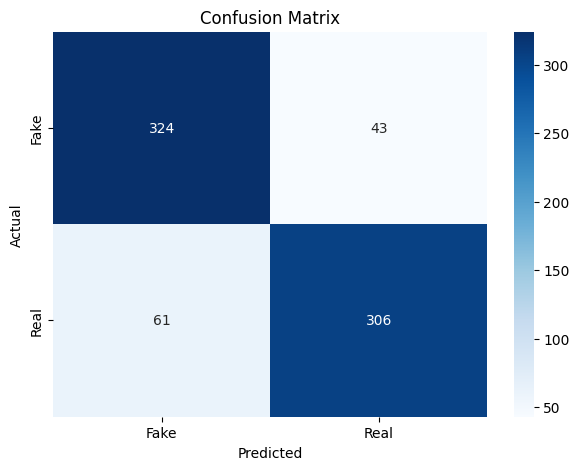

In [ ]:
print('accuracy: ', accuracy_score(gold_labels, predictions))
mismatch_pos = find_mismatch_pos(gold_labels, predictions)
plot_confusion_matrix(gold_labels, predictions)

In [ ]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(gold_labels, predict_labels))

0.8583106267029973


In [ ]:
model_id_2 = 'ft:gpt-3.5-turbo-0125:personal:cs298:9K4PrDYC'   # (train 236, test 29, val 29)
gold_labels_2, predictions_2 = predict_labels(client, model_id_2, test_messages_list)
print('accuracy: ', accuracy_score(gold_labels_2, predictions_2))

 15%|█▍        | 110/734 [00:39<03:55,  2.65it/s]

Index 110 waiting for 1 minutes...


 30%|██▉       | 220/734 [02:18<03:14,  2.64it/s]

Index 220 waiting for 1 minutes...


 45%|████▍     | 330/734 [03:57<02:29,  2.71it/s]

Index 330 waiting for 1 minutes...


 60%|█████▉    | 440/734 [05:38<01:47,  2.74it/s]

Index 440 waiting for 1 minutes...


 75%|███████▍  | 550/734 [07:17<01:05,  2.82it/s]

Index 550 waiting for 1 minutes...


 90%|████████▉ | 660/734 [08:56<00:26,  2.83it/s]

Index 660 waiting for 1 minutes...


100%|██████████| 734/734 [10:22<00:00,  1.18it/s]

accuracy:  0.8392370572207084


accuracy:  0.8392370572207084
number of mismatches:,  118


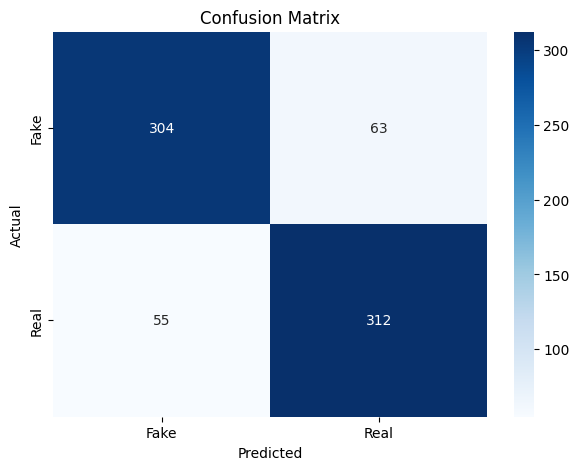

In [ ]:
print('accuracy: ', accuracy_score(gold_labels_2, predictions_2))
mismatch_pos_2 = find_mismatch_pos(gold_labels_2, predictions_2)
plot_confusion_matrix(gold_labels_2, predictions_2)

In [ ]:
model_id_3 = 'ft:gpt-3.5-turbo-0125:personal:cs298-59:9KgdKtjT' # train 59, val 7, test 7
gold_labels_3, predictions_3 = predict_labels(client, model_id_3, test_messages_list)
print('accuracy: ', accuracy_score(gold_labels_3, predictions_3))

 15%|█▍        | 110/734 [00:38<03:48,  2.73it/s]

Index 110 waiting for 1 minutes...


 30%|██▉       | 220/734 [02:16<02:59,  2.87it/s]

Index 220 waiting for 1 minutes...


 45%|████▍     | 330/734 [03:53<02:18,  2.91it/s]

Index 330 waiting for 1 minutes...


 60%|█████▉    | 440/734 [06:24<01:41,  2.90it/s]

Index 440 waiting for 1 minutes...


 75%|███████▍  | 550/734 [08:01<01:03,  2.90it/s]

Index 550 waiting for 1 minutes...


 79%|███████▉  | 580/734 [09:13<00:55,  2.77it/s]

In [ ]:
len(gold_labels_3)

734

accuracy:  0.837874659400545
number of mismatches:,  119


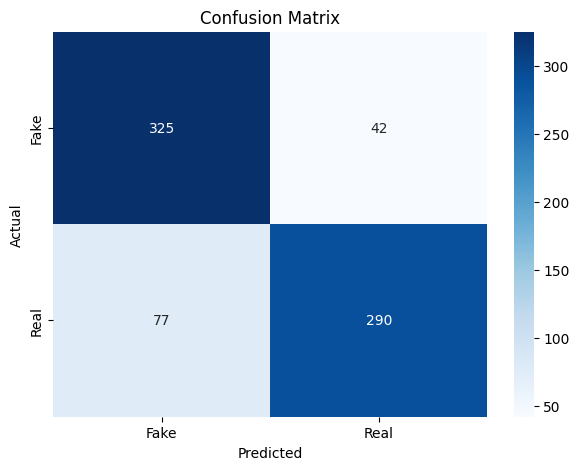

In [ ]:
print('accuracy: ', accuracy_score(gold_labels_3, predictions_3))
mismatch_pos_3 = find_mismatch_pos(gold_labels_3, predictions_3)
plot_confusion_matrix(gold_labels_3, predictions_3)

In [ ]:
print(len(mismatch_pos))
print(len(mismatch_pos_2))
print(len(mismatch_pos_3))

104
118
119


In [ ]:
def find_matching_pos(mismatch_pos1, mismatch_pos2, mismatch_pos3):
  match_pos = []
  for pos in mismatch_pos1:
    if pos in mismatch_pos2 and pos in mismatch_pos3:
      match_pos.append(pos)
  print('number of matches:, ', len(match_pos))
  return match_pos

In [ ]:
predicted_data = {
    'gold_labels': [str(label) for label in gold_labels],
    'predictions': [str(label) for label in predictions],
    'gold_labels_2': [str(label) for label in gold_labels_2],
    'predictions_2': [str(label) for label in predictions_2],
    'gold_labels_3': [str(label) for label in gold_labels_3],
    'predictions_3': [str(label) for label in predictions_3],
    'mismatch_pos': [str(pos) for pos in mismatch_pos.tolist()],
    'mismatch_pos_2': [str(pos) for pos in mismatch_pos_2.tolist()],
    'mismatch_pos_3': [str(pos) for pos in mismatch_pos_3.tolist()],
    'wronly_predicted_reviews': [str(pos) for pos in wronly_predicted_reviews]
}

# save file
file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/predicted.json'
with open(file_path, 'w') as file:
     json.dump(predicted_data, file)

In [ ]:
# read file
file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/predicted.json'
with open(file_path, 'r') as file:
     predicted_results = json.load(file)

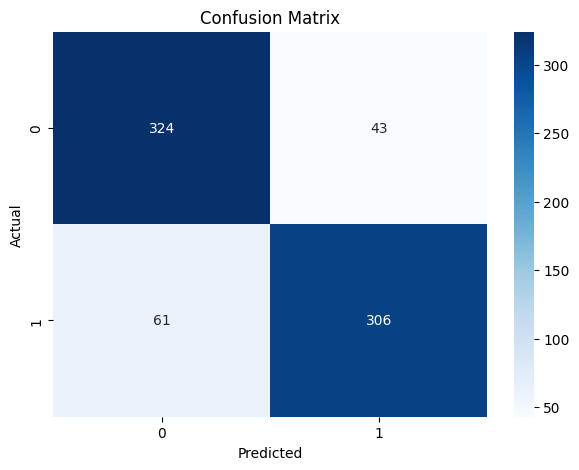

In [ ]:
plot_confusion_matrix(predicted_results['gold_labels'], predicted_results['predictions'])

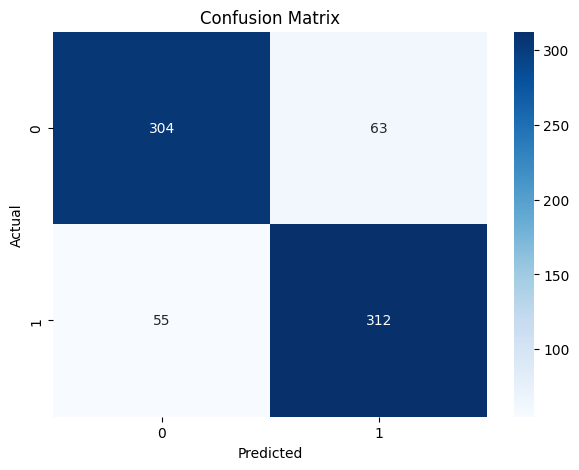

In [ ]:
plot_confusion_matrix(predicted_results['gold_labels_2'], predicted_results['predictions_2'])

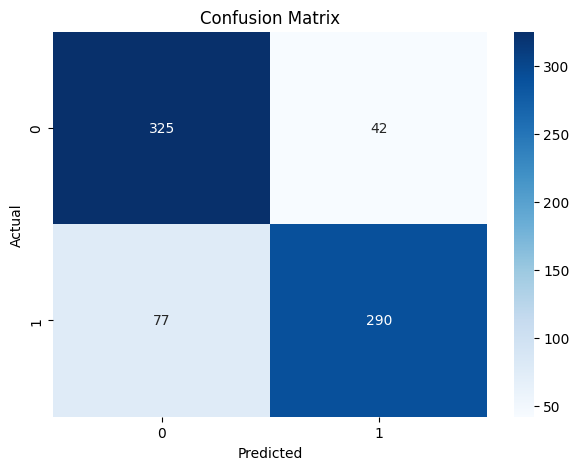

In [ ]:
plot_confusion_matrix(predicted_results['gold_labels_3'], predicted_results['predictions_3'])

### Use fine-tuned GPT model

In [ ]:
# read file
file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/GPT_opinions_extracted_data.json'
with open(file_path, 'r') as file:
     opinions_extracted_data = json.load(file)

print(len(opinions_extracted_data))
print(opinions_extracted_data[7])

928
{'review_id': 'review_488342', 'business_id': 'Savoy Hotel Amsterdam', 'text': 'The first night our room was not available we arrived late and clearly the room had been given to someone else', 'extractions': [{'predicate': 'not available', 'entity': 'room', 'sentiment': -1}, {'predicate': 'given to someone else', 'entity': 'room', 'sentiment': -1}]}


In [ ]:
def get_input_message(review_text, opinion1, opinion2, label):
    input_message = {
        "role": "user",
        "content": f"Based on this sentence: '{review_text}', do you think '{opinion2}' explains '{opinion1}'? Enter '1' for Yes and '0' for No."
    }
    return input_message

In [ ]:
model_id = 'ft:gpt-3.5-turbo-0125:personal::9K0lJfN0'

start_time = time.time()

edges_extracted_data = []
predict_labels = []
for i, review in enumerate(tqdm(opinions_extracted_data)):
    try:
        review_text = review['text']
        opinion_pairs = list(itertools.permutations(review['extractions'], 2))
        if opinion_pairs:
            for opinion_pair in opinion_pairs:
                opinion1 = opinion_pair[0]['predicate'] + ' ' + opinion_pair[0]['entity']
                opinion2 = opinion_pair[1]['predicate'] + ' ' + opinion_pair[1]['entity']
                input_message = get_input_message(review_text, opinion1, opinion2, label)
                # print(input_message)
                label = precict_label(client, model_id_2, input_message)

                edge_data = dict()
                edge_data['ID'] = review['review_id']
                edge_data['Hotel'] = review['business_id']
                edge_data['Sentence'] = review['text']
                edge_data['Opinion A'] = opinion1
                edge_data['Predicate A'] = opinion_pair[0]['predicate']
                edge_data['Entity A'] = opinion_pair[0]['entity']
                edge_data['Sentiment A'] = opinion_pair[0]['sentiment']
                edge_data['Opinion B'] = opinion2
                edge_data['Predicate B'] = opinion_pair[1]['predicate']
                edge_data['Entity B'] = opinion_pair[1]['entity']
                edge_data['Sentiment B'] = opinion_pair[1]['sentiment']
                edge_data['Label'] = label
                edges_extracted_data.append(edge_data)
    except Exception as e:
        print(f"An error occurred for review at index {i}: {e}")
        print(label, input_message)

    if i != 0 and i % 50 == 0:
        wait_min = random.choice([1, 2])
        print(f"Index {i} waiting for {wait_min} minutes...")
        time.sleep(wait_min*60)

end_time = time.time()  # End timing
execution_time = end_time - start_time  # Calculate the total execution time in seconds

# Convert seconds to hour, minute, second format
hours, remainder = divmod(execution_time, 3600)
minutes, seconds = divmod(remainder, 60)

# Print the execution time in a formatted string
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")


# save file
file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/fine_tune_gpt_edges_extracted_data.json'
with open(file_path, 'w') as file:
     json.dump(edges_extracted_data, file)

  5%|▌         | 50/928 [01:06<14:40,  1.00s/it]

Index 50 waiting for 1 minutes...


 10%|█         | 95/928 [02:34<08:35,  1.62it/s]

Index 100 waiting for 2 minutes...


 16%|█▌        | 150/928 [04:48<03:00,  4.30it/s]

Index 150 waiting for 2 minutes...


 21%|██▏       | 199/928 [07:52<21:15,  1.75s/it]

Index 200 waiting for 1 minutes...


 27%|██▋       | 248/928 [09:31<13:03,  1.15s/it]

Index 250 waiting for 1 minutes...


 31%|███▏      | 290/928 [10:47<04:15,  2.50it/s]

Index 300 waiting for 1 minutes...


 38%|███▊      | 349/928 [12:13<05:35,  1.72it/s]

Index 350 waiting for 1 minutes...


 43%|████▎     | 397/928 [13:56<01:48,  4.88it/s]

Index 400 waiting for 1 minutes...


 48%|████▊     | 443/928 [15:33<08:35,  1.06s/it]

Index 450 waiting for 2 minutes...


 54%|█████▍    | 500/928 [18:14<07:28,  1.05s/it]

Index 500 waiting for 2 minutes...


 59%|█████▉    | 550/928 [21:21<04:38,  1.36it/s]

Index 550 waiting for 1 minutes...


 64%|██████▍   | 598/928 [22:48<01:51,  2.95it/s]

Index 600 waiting for 1 minutes...


 70%|██████▉   | 646/928 [24:08<01:26,  3.25it/s]

Index 650 waiting for 2 minutes...


 75%|███████▌  | 700/928 [26:46<01:57,  1.95it/s]

Index 700 waiting for 1 minutes...


 81%|████████  | 749/928 [28:12<02:08,  1.40it/s]

Index 750 waiting for 1 minutes...


 86%|████████▌ | 799/928 [29:28<00:35,  3.60it/s]

Index 800 waiting for 1 minutes...


 91%|█████████▏| 849/928 [31:14<01:05,  1.20it/s]

Index 850 waiting for 1 minutes...


 97%|█████████▋| 900/928 [33:05<00:16,  1.67it/s]

Index 900 waiting for 2 minutes...


100%|██████████| 928/928 [35:29<00:00,  2.29s/it]

Execution time: 0 hours, 35 minutes, 29 seconds


# Clustering

In [ ]:
! pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np
import json
import os

from collections import defaultdict
from sklearn.cluster import DBSCAN

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import KeyedVectors

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from gensim.models import Word2Vec

from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler

from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from itertools import product, islice

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def get_optimal_k(embeddings, method, k_values=[150, 175, 200, 225, 250, 275, 300]):
  silhouette_scores = []
  for k in k_values:
    if method == 'kmeans':
      model = KMeans(n_clusters=k, random_state=42, n_init = 'auto') #TODO: random_state?
    elif method == 'spectral':
      model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=0)
    else:
      raise ValueError("Unsupported clustering method")

    labels = model.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)

  max_silhouette_value = max(silhouette_scores)
  optimal_k = k_values[silhouette_scores.index(max_silhouette_value)]
  print(f"Optimal number of clusters ({method}): {optimal_k} | silhouette value: {max_silhouette_value}")

  return optimal_k

In [ ]:
# Compute cosine similarity for every unique pair of clusters
def get_similarity_edges(cluster_embeddings, threshold=0.8):
  unique_pairs = [(c1, c2) for idx, c1 in enumerate(cluster_embeddings.keys()) for c2 in list(cluster_embeddings.keys())[idx+1:]]

  cluster_similarity = {}
  for c1, c2 in unique_pairs:
      avg_emb1 = cluster_embeddings[c1]['average_embedding'].reshape(1, -1)
      avg_emb2 = cluster_embeddings[c2]['average_embedding'].reshape(1, -1)
      # Compute cosine similarity and store it in a dictionary with cluster pair as key
      cluster_similarity[(str(c1), str(c2))] = cosine_similarity(avg_emb1, avg_emb2)[0][0]

  # thresholod
  similarity_edges = [cluster_pair for cluster_pair, similarity in cluster_similarity.items() if similarity > threshold]

  return similarity_edges

In [ ]:
file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/fine_tune_gpt_edges_extracted_data.json'
with open(file_path, 'r') as file:
    gpt_edges_extracted_data = json.load(file)

print(len(gpt_edges_extracted_data))
print(gpt_edges_extracted_data[0])

3550
{'ID': 'review_488343', 'Hotel': 'Savoy Hotel Amsterdam', 'Sentence': 'Staff spot on location nicely out of town and good prices', 'Opinion A': 'spot on Staff', 'Predicate A': 'spot on', 'Entity A': 'Staff', 'Sentiment A': 1, 'Opinion B': 'nicely out of town location', 'Predicate B': 'nicely out of town', 'Entity B': 'location', 'Sentiment B': 1, 'Label': '0'}


In [ ]:
gpt_edges_extracted_data[5:10]

[{'ID': 'review_488343',
  'Hotel': 'Savoy Hotel Amsterdam',
  'Sentence': 'Staff spot on location nicely out of town and good prices',
  'Opinion A': 'good prices',
  'Predicate A': 'good',
  'Entity A': 'prices',
  'Sentiment A': 1,
  'Opinion B': 'nicely out of town location',
  'Predicate B': 'nicely out of town',
  'Entity B': 'location',
  'Sentiment B': 1,
  'Label': '0'},
 {'ID': 'review_488343',
  'Hotel': 'Savoy Hotel Amsterdam',
  'Sentence': 'Big spacious clean room with immaculate bedding',
  'Opinion A': 'Big spacious clean room',
  'Predicate A': 'Big spacious clean',
  'Entity A': 'room',
  'Sentiment A': 1,
  'Opinion B': 'immaculate bedding',
  'Predicate B': 'immaculate',
  'Entity B': 'bedding',
  'Sentiment B': 1,
  'Label': '1'},
 {'ID': 'review_488343',
  'Hotel': 'Savoy Hotel Amsterdam',
  'Sentence': 'Big spacious clean room with immaculate bedding',
  'Opinion A': 'immaculate bedding',
  'Predicate A': 'immaculate',
  'Entity A': 'bedding',
  'Sentiment A': 1,

In [ ]:
# get grouped by hotel data
hotel_edges_extracted_dict = defaultdict(list)
for review in gpt_edges_extracted_data:
  hotel = review['Hotel']
  hotel_edges_extracted_dict[hotel].append(review)

print(hotel_edges_extracted_dict.keys())

dict_keys(['Savoy Hotel Amsterdam', 'NH Amsterdam Museum Quarter', 'Crowne Plaza Amsterdam South'])


In [ ]:
grouped_data = hotel_edges_extracted_dict['Savoy Hotel Amsterdam']
len(grouped_data)

1398

In [ ]:
for hotel, grouped_data in hotel_edges_extracted_dict.items():
  print(f'HOTEL: {hotel} of length {len(grouped_data)}')

HOTEL: Savoy Hotel Amsterdam of length 1398
HOTEL: NH Amsterdam Museum Quarter of length 912
HOTEL: Crowne Plaza Amsterdam South of length 1240


In [ ]:
embedding_methods = ['word2vec', 'doc2vec', 'bert']
cluster_methods = ['kmeans', 'dbscan', 'spectral']
combinations = list(product(embedding_methods, cluster_methods))
for hotel, grouped_data in hotel_edges_extracted_dict.items():
  print(f'HOTEL: {hotel} of length {len(grouped_data)}')
  for (embedding_method, cluster_method) in combinations:
      print(embedding_method, cluster_method)
      opinions, opinion_and_id_map = get_opinions(grouped_data)
      edges = get_edges(opinion_and_id_map, grouped_data)  # [(opinion1_id, opinion2_id)] : [(0, 2), (1, 0)]
      opinion_embedding_dict = get_opinion_and_aspect_embedding_dict(opinions, opinion_and_id_map, embedding_method) # {id: {'content':, 'embedding':, 'aspect embedding':}}
      opinion_cluster_dict = get_cluster_labels(opinion_embedding_dict, cluster_method) # {opinion_id: cluster_label}: {467: -1, 482: -2}
      opinions_by_cluster, ids_by_cluster = get_opinion_cluster(opinion_cluster_dict, opinion_embedding_dict) # {cluster_label: [opinion_texts]}
      explainable_edges = get_explainable_edges(edges, opinion_cluster_dict) # [(cluster_label1, cluster_label2)] : [(-273, -173), (-133, -273)]
      calculate_performance_score(opinion_embedding_dict, opinion_cluster_dict)
      # save_graph_info(opinions_by_cluster, [], explainable_edges, (hotel, embedding_method, cluster_method))
  print()

# calculate_performance_score(opinion_embeddings, cluster_labels)


HOTEL: Savoy Hotel Amsterdam of length 1398
word2vec kmeans
number of unique opinions:  485
number of edges for opinion pairs:  980
Optimal number of clusters (kmeans): 300 | silhouette value: 0.06110699847340584
number of explainable edges between clusters:  892
silhouette score: 0.046970345079898834, davies bouldin score: 0.8736374287170889, calinski harabasz: 3.332566519250147
word2vec dbscan
number of unique opinions:  485
number of edges for opinion pairs:  980
number of explainable edges between clusters:  962
silhouette score: 0.03277413547039032, davies bouldin score: 0.4804809091321044, calinski harabasz: 4.185991766192383
word2vec spectral
number of unique opinions:  485
number of edges for opinion pairs:  980
Optimal number of clusters (spectral): 150 | silhouette value: 0.02640639990568161
number of explainable edges between clusters:  800
silhouette score: 0.02553744614124298, davies bouldin score: 1.6649022698238638, calinski harabasz: 3.209327453865911
doc2vec kmeans
num

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Optimal number of clusters (kmeans): 150 | silhouette value: 0.09518560022115707
number of explainable edges between clusters:  781
silhouette score: 0.10048556327819824, davies bouldin score: 1.3455632392620511, calinski harabasz: 4.501141393354468
bert dbscan
number of unique opinions:  485
number of edges for opinion pairs:  980
number of explainable edges between clusters:  906
silhouette score: 0.07222548127174377, davies bouldin score: 0.5285657966212691, calinski harabasz: 4.656499495169235
bert spectral
number of unique opinions:  485
number of edges for opinion pairs:  980
Optimal number of clusters (spectral): 150 | silhouette value: 0.069551981985569
number of explainable edges between clusters:  791
silhouette score: 0.06811781972646713, davies bouldin score: 1.4780830204636515, calinski harabasz: 4.0246683645531

HOTEL: NH Amsterdam Museum Quarter of length 912
word2vec kmeans
number of unique opinions:  321
number of edges for opinion pairs:  619
Optimal number of cluster

In [ ]:
# opinions, opinion_and_id_map = get_opinions(grouped_data)
# edges = get_edges(opinion_and_id_map, grouped_data)  # [(opinion1_id, opinion2_id)] : [(0, 2), (1, 0)]
# opinion_embedding_dict = get_opinion_and_aspect_embedding_dict(opinions, opinion_and_id_map, 'bert') # {id: {'content':, 'embedding':, 'aspect embedding':}}
# opinion_cluster_dict = get_cluster_labels(opinion_embedding_dict, 'dbscan') # {opinion_id: cluster_label}: {467: -1, 482: -2}
# opinions_by_cluster, ids_by_cluster = get_opinion_cluster(opinion_cluster_dict, opinion_embedding_dict) # {cluster_label: [opinion_texts]}
# explainable_edges = get_explainable_edges(edges, opinion_cluster_dict) # [(cluster_label1, cluster_label2)] : [(-273, -173), (-133, -273)]

In [ ]:
# cluster_embeddings = get_cluster_embeddings(ids_by_cluster, opinion_embedding_dict)
# # similarity_edges = get_similarity_edges(cluster_embeddings, threshold=1)

In [ ]:
# similarity_edges = get_similarity_edges(cluster_embeddings, threshold=1)

In [ ]:
# save_graph_info(opinions_by_cluster, [], explainable_edges, ('Savoy Hotel Amsterdam', 'bert', 'dbscan'))

In [ ]:
import shutil
import os

# Path to the folder you want to zip
folder_path = '/content/drive/My Drive/ExplainIt/explainit/opinion_canonicalization/yichen_graph_data/'

# Path for the output zip file
zip_path = '/content/CS298_graphs.zip'

# Creating a zip archive
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

'/content/CS298_graphs.zip'

In [ ]:
def save_graph_info(opinions_by_cluster, similarity_edges, explainable_edges, graph_info):
  nodes = []
  for cluster, opinions in opinions_by_cluster.items():
      nodes.append({"id": str(cluster), "text": opinions})

  # Transform 'explains' edges
  edges = [{'from': str(from_node), 'to': str(to_node), 'type': 'explains'} for from_node, to_node in explainable_edges]

  # Transform 'similar' edges
  edges += [{'from': str(from_node), 'to': str(to_node), 'type': 'similar', 'bidirectional': True} for from_node, to_node in similarity_edges]
  # Save to a JSON file in Google Drive
  # path = '/content/drive/My Drive/ExplainIt/explainit/opinion_canonicalization/yichen_graoh_data/graph.data.json'
  hotel_name, embedding_method, cluster_method = graph_info

  path = '/content/drive/My Drive/ExplainIt/explainit/opinion_canonicalization/yichen_graph_data/'
  file_name = hotel_name + '_' + embedding_method + '_' + cluster_method + '.json'
  file_path = os.path.join(path, file_name)
  with open(file_path, 'w') as f:
    json.dump({'nodes': nodes, 'edges': edges}, f)

In [ ]:
# output: [(opinion1_id, opinion2_id)] : [(0, 2), (1, 0)]
def get_edges(opinion_and_id_map, gpt_edges_extracted_data):
    edge_pairs = []
    for review in gpt_edges_extracted_data:
        if review['Label'] == '0':
            opinion1_id = opinion_and_id_map[review['Opinion A'].lower()]['id']
            opinion2_id = opinion_and_id_map[review['Opinion B'].lower()]['id']
            edge_pairs.append((opinion1_id, opinion2_id))
    print('number of edges for opinion pairs: ', len(edge_pairs))
    return edge_pairs

In [ ]:
def get_opinions(gpt_edges_extracted_data):
    opinions = set()
    opinion_and_id_map = {}
    id = 0
    for review in gpt_edges_extracted_data:
        opinion1 = review['Opinion A'].lower()
        opinion2 = review['Opinion B'].lower()
        opinions.add(opinion1)
        opinions.add(opinion2)
        if opinion1 not in opinion_and_id_map:
            opinion_and_id_map[opinion1] = {'id': id, 'predicate': review['Predicate A'].lower(), 'aspect': review['Entity A'].lower(), 'sentiment': review['Sentiment A']}
            id += 1

        if opinion2 not in opinion_and_id_map:
            opinion_and_id_map[opinion2] = {'id': id, 'predicate': review['Predicate B'].lower(), 'aspect': review['Entity B'].lower(), 'sentiment': review['Sentiment B']}
            id += 1
    print('number of unique opinions: ', len(opinions))
    return list(opinions), opinion_and_id_map

In [ ]:
# output: # {opinion_id: {'content':, 'embedding':, 'aspect embedding': }}
def get_opinion_and_aspect_embedding_dict(opinions, opinion_and_id_map, method):
  aspects = [review['aspect'] for review in opinion_and_id_map.values()]

  opinion_embedding_dict = {}
  if method == 'bert':
    model = SentenceTransformer('all-MiniLM-L6-v2')
    opinion_embeddings = model.encode(opinions) # return ndarray 20, 384 embedding
    aspect_embeddings = model.encode(aspects)

  elif method == 'doc2vec':
    # preproces the documents, and create TaggedDocuments
    tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[str(i)]) for i, doc in enumerate(opinions)]

    # train the Doc2vec model
    model = Doc2Vec(vector_size=100,
                    min_count=2, epochs=50)
    model.build_vocab(tagged_data)
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)

    opinion_embeddings = [model.infer_vector(word_tokenize(doc)) for doc in opinions]
    aspect_embeddings = [model.infer_vector(word_tokenize(doc)) for doc in aspects]
  elif method == 'word2vec':
    tokenized_opinions = [opinion.split() for opinion in opinions]
    tokenized_aspects = [aspect.split() for aspect in aspects]

    # Train a Word2Vec model
    word2vec_model = Word2Vec(sentences=tokenized_opinions, vector_size=100, window=5, min_count=1, workers=4)

    opinion_embeddings = []
    aspect_embeddings = []
    for opinion, aspect in zip(tokenized_opinions, tokenized_aspects):
      vectors = [word2vec_model.wv[word] for word in opinion if word in word2vec_model.wv.key_to_index]
      aspect_vectors = [word2vec_model.wv[word] for word in aspect if word in word2vec_model.wv.key_to_index]
      if vectors:
        opinion_embeddings.append(np.mean(vectors, axis=0))
        aspect_embeddings.append(np.mean(aspect_vectors, axis=0))
      else:
        opinion_embeddings.append(np.zeros(word2vec_model.vector_size))
        aspect_embeddings.append(np.zeros(word2vec_model.vector_size))
  else:
    raise ValueError("Unsupported method")

  # print(opinion_embeddings)
  for opinion, embedding, aspect_embedding in zip(opinions, opinion_embeddings, aspect_embeddings):
    opinion_id = opinion_and_id_map[opinion]['id']
    opinion_embedding_dict[opinion_id] = {'content': opinion, 'embedding': embedding ,'aspect embedding': aspect_embedding}
  return opinion_embedding_dict

In [ ]:
# Clustering: output: # {opinion_id: cluster_label}: {467: -1, 482: -2}
def get_cluster_labels(opinion_embedding_dict, method):
  opinion_ids = []
  embeddings = []
  for key, value in opinion_embedding_dict.items():
    opinion_ids.append(key)
    embeddings.append(value['embedding'])

  # scale embeddings before clustering
  scaler = StandardScaler()
  scaled_embeddings = scaler.fit_transform(embeddings)

  if method == 'dbscan':
    clustering_model = DBSCAN(eps=0.3, min_samples=2, metric='cosine') # TODO: change eps
    #
  elif method == 'kmeans':
    # Adjust the number of clusters (n_clusters) as needed
    n_clusters = get_optimal_k(embeddings, method=method)
    clustering_model = KMeans(n_clusters=n_clusters, random_state=42, n_init = 'auto')

  elif method == 'spectral':
    # Adjust the number of clusters (n_clusters) as needed
    n_clusters = get_optimal_k(embeddings, method=method)
    # Spectral Clustering parameters can be adjusted as needed
    clustering_model = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)

  else:
    raise ValueError("Unsupported clustering method")
  cluster_labels = clustering_model.fit_predict(scaled_embeddings)
  new_label = -1
  for i, label in enumerate(cluster_labels):
    if label == -1:
      cluster_labels[i] = new_label
    new_label -= 1

  return dict(zip(opinion_ids, cluster_labels))

In [ ]:
# output: {cluster_label: [opinion_texts]}
def get_opinion_cluster(opinion_cluster_dict, opinion_embedding_dict):
  # Map opinion_id to their cluster
  cluster_dict = defaultdict(list)
  cluster_id_dict = defaultdict(list)
  for opinion_id, cluster_label in opinion_cluster_dict.items():
    cluster_dict[str(cluster_label)].append(opinion_embedding_dict[opinion_id]['content'])
    cluster_id_dict[str(cluster_label)].append(opinion_id)
  return cluster_dict, cluster_id_dict

In [ ]:
# output: [(cluster_label1, cluster_label2)] : [(-273, -173), (-133, -273)]
def get_explainable_edges(edges, opinion_cluster_dict):
  explainable_edges = []
  for (opinion1_id, opinion2_id) in edges:
    opinion1_cluster_label = opinion_cluster_dict[opinion1_id]
    opinion2_cluster_label = opinion_cluster_dict[opinion2_id]
    if opinion1_cluster_label != opinion2_cluster_label:
      explainable_edges.append((opinion1_cluster_label, opinion2_cluster_label))
  print('number of explainable edges between clusters: ', len(set(explainable_edges)))
  return set(explainable_edges)

In [ ]:
# opinions = pd.concat([group_df['Opinion A'], group_df['Opinion B']]).tolist()
# opinion_embeddings = get_embeddings(list(set(opinions)), 'bert')


In [ ]:
# w2v_opinion_embeddings = get_embeddings(list(set(opinions)), 'word2vec')

In [ ]:
# d2v_opinion_embeddings = get_embeddings(list(set(opinions)), 'doc2vec')

In [ ]:
# TRY TO PUT WHAT I HAVE RIGHT NOW!!!!! INDLUCIND SIMILARITY EDGE ON ASPECT TERM!!!! IMPROVE AFTER WARDS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def reduce_dimensions_pca(embeddings, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    return reduced_embeddings

def reduce_dimensions_tsne(embeddings, n_components=2, perplexity=30, n_iter=300):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)
    return reduced_embeddings

def plot_embeddings(reduced_embeddings, labels=None):
    plt.figure(figsize=(8, 6))
    if labels is not None:
        for i, label in enumerate(set(labels)):
            indices = [j for j, x in enumerate(labels) if x == label]
            plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=label)
        plt.legend()
    else:
        plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('2D projection of embeddings')
    plt.grid(True)
    plt.show()


In [ ]:
def calculate_performance_score(opinion_embedding_dict, opinion_cluster_dict):
    embeddings = []
    cluster_labels = []
    for opinion_id, review in opinion_embedding_dict.items():
      embeddings.append(review['embedding'])
      cluster_labels.append(opinion_cluster_dict[opinion_id])

    # Check if there is more than one cluster and more than one element per cluster to calculate the score
    if len(set(cluster_labels)) == 1 or len(set(cluster_labels)) == len(embeddings):
        print("Silhouette score cannot be calculated with a single cluster or if each data point is its own cluster.")
        return None

    silhouette_value = silhouette_score(embeddings, cluster_labels) #TODO: CHECH DISTANCE
    davies_bouldin_value = davies_bouldin_score(embeddings, cluster_labels)
    calinski_harabasz_value = calinski_harabasz_score(embeddings, cluster_labels)
    print(f'silhouette score: {silhouette_value}, davies bouldin score: {davies_bouldin_value}, calinski harabasz: {calinski_harabasz_value}')
    return silhouette_value, davies_bouldin_value, calinski_harabasz_value


In [ ]:
# get cluster embedding {cluster_label: {'total_embeddings': embedding, 'count': 0, 'average_embedding': []}}
def get_cluster_embeddings(ids_by_cluster, opinion_embedding_dict):
  # iterate through clusters
  cluster_embeddings = {}
  for cluster_label, opinion_ids in ids_by_cluster.items():
    opinion_count = len(opinion_ids)
    for opinion_id in opinion_ids:
      if cluster_label not in cluster_embeddings:
        cluster_embeddings[cluster_label] = {'total_embeddings': opinion_embedding_dict[opinion_id]['aspect embedding'], 'count': opinion_count, 'average_embedding': []}
      else:
        cluster_embeddings[cluster_label]['total_embeddings'] += opinion_embedding_dict[opinion_id]['aspect embedding']
    # # Calculate average embeddings
    cluster_embeddings[str(cluster_label)]['average_embedding'] = cluster_embeddings[str(cluster_label)]['total_embeddings'] / cluster_embeddings[str(cluster_label)]['count']

  return cluster_embeddings


# Compute cosine similarity for every unique pair of clusters
def get_similarity_edges(cluster_embeddings, threshold=0.8):
  unique_pairs = [(c1, c2) for idx, c1 in enumerate(cluster_embeddings.keys()) for c2 in list(cluster_embeddings.keys())[idx+1:]]

  cluster_similarity = {}
  for c1, c2 in unique_pairs:
      avg_emb1 = cluster_embeddings[c1]['average_embedding'].reshape(1, -1)
      avg_emb2 = cluster_embeddings[c2]['average_embedding'].reshape(1, -1)
      # Compute cosine similarity and store it in a dictionary with cluster pair as key
      cluster_similarity[(str(c1), str(c2))] = cosine_similarity(avg_emb1, avg_emb2)[0][0]

  # thresholod
  similarity_edges = [cluster_pair for cluster_pair, similarity in cluster_similarity.items() if similarity > threshold]
  print('number of similarity edges: ', len(similarity_edges))
  return similarity_edges

# Summarization

In [ ]:
import os
import pandas as pd
from itertools import product, islice
import json

In [ ]:
# Step 1: Read and Parse the JSON File
import json
import os
import networkx as nx
import numpy as np

def load_graph(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    G = nx.DiGraph()
    for node in data['nodes']:
        G.add_node(node['id'], text=node['text'])
    for edge in data['edges']:
        if edge['type'] == 'explains':
            G.add_edge(edge['from'], edge['to'], type='explains')
        elif edge['type'] == 'similar' and 'bidirectional' in edge:
            G.add_edge(edge['from'], edge['to'], type='similar', bidirectional=True)
            G.add_edge(edge['to'], edge['from'], type='similar', bidirectional=True)
    return G

# Example usage
folder_path = '/content/drive/My Drive/ExplainIt/explainit/opinion_canonicalization/yichen_graph_data/'
file_path = os.path.join(folder_path, 'test_test_test.json')

graph = load_graph(file_path)

In [ ]:
# Get all nodes with their attributes
node_dict = dict(graph.nodes(data=True))

# Printing the dictionary to see its contents
print(node_dict)

{'-1': {'text': ['not good storage place']}, '-2': {'text': ['safe location']}, '-3': {'text': ['very slow internet access']}, '0': {'text': ['quite small room', 'very small room', 'small room size', 'small room']}, '1': {'text': ['great value for money', 'practically unbeatable great value for money']}, '-6': {'text': ['easy accessibility']}, '-7': {'text': ['wrong hotel booking']}, '-8': {'text': ['very soft sheets']}, '2': {'text': ['nice and quite hotel', 'nice and quite location', 'quite nice location']}, '-10': {'text': ['excellent breakfast']}, '-11': {'text': ['last room']}, '-12': {'text': ['refund guests']}, '-13': {'text': ['high 20s temperature']}, '3': {'text': ['comfy bed', 'supper comfy bed']}, '-15': {'text': ['had to share bed']}, '-16': {'text': ['next to sarphatipark']}, '-17': {'text': ['basic clean and affordable hotel']}, '-18': {'text': ['not so close city centre']}, '-19': {'text': ['meant to be 4 star hotel']}, '-20': {'text': ['not so fluent some staffs']}, '-

In [ ]:
test = ['The hotel has ' + opinion + '.' for opinion in node_dict['0']['text']]
print(test)

['The hotel has quite small room.', 'The hotel has very small room.', 'The hotel has small room size.', 'The hotel has small room.']


In [ ]:
from transformers import pipeline

In [ ]:
# Load the model once
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
def generate_supernode_summary(opinions):
    # Prepare the text by concatenating all opinions
    concatenated_text = " ".join(opinions) + "."
    print(concatenated_text)
    # Generate summary
    summary = summarizer(concatenated_text, max_length=10, min_length=2, do_sample=False)  # Adjust max_length and min_length as needed

    return summary[0]['summary_text']

In [ ]:
generate_supernode_summary(test)

The hotel has quite small room. The hotel has very small room. The hotel has small room size. The hotel has small room..


'The hotel has quite small room.'

In [ ]:
summarization = ''
count = 0
for cluster_label, attribute_dict in node_dict.items():
  supernode_summary = generate_supernode_summary(attribute_dict['text'])
  summarization += supernode_summary + '. '
  print(supernode_summary)
  if count == 5:
    break
  count += 1

print(summarization)


Your max_length is set to 10, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


not good storage place.


Your max_length is set to 10, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


Not good storage place. not good
safe location.


Your max_length is set to 10, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


A. safe location. is a
very slow internet access.
very slow internet access. very slow
quite small room very small room small room size small room.
 quite small room very small room small
great value for money practically unbeatable great value for money.


Your max_length is set to 10, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


Great value for money. practically unbeat
easy accessibility.
The Daily Mail is committed to providing
Not good storage place. not good. A. safe location. is a. very slow internet access. very slow.  quite small room very small room small. Great value for money. practically unbeat. The Daily Mail is committed to providing. 


In [ ]:
node_dict['0']

{'text': ['quite complicated entry',
  'narrow Smell',
  'clean room',
  'dirty chairs',
  'very noisy curtain',
  'very stained Carpet',
  'very dry Ventilation system',
  'quiet view',
  'not consistently clean Rooms',
  'too short Hairdryer',
  'true cleaning',
  'Dirty floors',
  'Bad garbage smell',
  'transparent lock',
  'bad smell',
  'Clogged drain',
  'smelly entrance',
  'Clean reach',
  'Clean new',
  'quiet neighborhood',
  'narrow labyrinth',
  'damaged chairs',
  'very noisy Ventilation',
  'Light gray carpet',
  'noisy noise',
  'very dry air',
  'quiet surrounding',
  'bad entrance',
  'very upsetting spider web',
  'Dirty carpet',
  'very clean rooms',
  'wasn t ready for check',
  'transparent door',
  'broken mirror safe',
  'Filthy carpet',
  'poor decor',
  'a bit challenging door',
  'very clean room',
  'cleanless staff']}

In [ ]:
from transformers import pipeline

# Prepare the text by concatenating all opinions
opinions = [
    'really soft bed', 'very comfy Beds', 'so soft bed', 'somewhat soft Mattresses',
    'very comfy Bed', 'massive Pillows', 'Very soft bed', 'large Pillows',
    'very upsetting bed bugs', 'Comfortable bed', 'comfortable beds', 'super comfy bed',
    'not fixed together Bed', 'thick Pillows', 'Comfortable beds', 'incredibly comfortable bed',
    'Excellent comfort', 'little uncomfortable beds', 'MOST COMFORTABLE bed', 'firmest mattress',
    'austere Mattresses', 'a little small bed', 'massive blanket', 'very comfortable bed',
    'uncomfortable twin', 'Good beds', 'not fixed together beds'
]
concatenated_text = " and ".join(opinions) + "."

# Load a pre-trained summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Generate summary
summary = summarizer(concatenated_text, max_length=10, min_length=2, do_sample=False)

# Print the summary
print("Generated Summary:", summary[0]['summary_text'])

Generated Summary: Comfortable beds and incredibly comfortable bed


In [ ]:
import torch

In [ ]:
print(output)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.2045, -0.0853, -0.4050,  ..., -0.4103,  0.0547,  0.7557],
         [-0.0907,  0.3704, -0.9859,  ..., -0.2916,  0.6848,  0.3025],
         [-0.3005, -0.0270,  0.0771,  ..., -0.1201,  0.1028, -0.1227],
         [-0.4421, -0.4532, -0.3993,  ...,  0.2128, -0.0287,  0.2489],
         [ 1.0128, -0.1571, -0.5408,  ...,  0.2227, -0.9428, -0.2311]],

        [[-0.3138,  0.0128, -0.4682,  ..., -0.4795,  0.0673,  0.6303],
         [-0.1270,  0.2887, -0.7243,  ..., -0.2770,  0.6182,  0.3272],
         [-0.2577, -0.0137, -0.0250,  ..., -0.2545,  0.2426,  0.0174],
         [-0.1964, -0.4675, -0.7283,  ...,  0.1445,  0.1114, -0.2495],
         [ 1.0045, -0.1098, -0.4837,  ...,  0.2497, -0.8422, -0.1524]],

        [[-0.3265,  0.1328, -0.4477,  ..., -0.3946,  0.0880,  0.6719],
         [-0.0544,  0.3507, -0.7276,  ..., -0.2226,  0.6593,  0.4186],
         [-0.2678,  0.1388, -0.0297,  ..., -0.0587,  0.1879, -0.0016],
         [

In [ ]:
pip install nltk


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    words = word_tokenize(text.lower())
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    return filtered_words



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Apply preprocessing to each opinion
opinions = node_dict['10']['text']
processed_opinions = [preprocess(opinion) for opinion in opinions]

In [ ]:
# Flatten the list of words and count occurrences
all_words = [word for sublist in processed_opinions for word in sublist]
word_counts = Counter(all_words)

# Get the first two most common words and create a summary
top_two_words = word_counts.most_common(2)
summary = ' '.join(word for word, count in top_two_words)

print("Summary:", summary)


Summary: glass tea


### FUCK

In [ ]:
# start_time = time.time()
# edges_extracted_data = []
# for i, review in enumerate(tqdm(opinions_extracted_data[10:11], total=len(opinions_extracted_data[10:11]))):
#     try:
#         review_text = review['text']
#         opinions = [i['predicate'] + ' ' + i['entity'] for i in review['extractions']]
#         opinion_pairs = list(itertools.permutations(opinions, 2))
#         if opinion_pairs:
#             for opinion_pair in opinion_pairs:
#                 info_dict = extract_explanatory_relationship(review_text, opinion_pair, AN_API_KEY)
#                 info_dict_json = json.loads(info_dict)
#                 # print(info_dict_json)
#                 edge_data = dict()
#                 edge_data['ID'] = review['review_id']
#                 edge_data['Hotel'] = review['business_id']
#                 edge_data['Sentence'] = review['text']
#                 edge_data['Opinion A'] = info_dict_json['opinion1']
#                 edge_data['Opinion B'] = info_dict_json['opinion2']
#                 edge_data['Label'] = info_dict_json['explain']
#                 # print(edge_data)
#                 edges_extracted_data.append(edge_data)

#     except json.JSONDecodeError as e:
#         print(f"Failed to decode JSON for review at index {i}: {e}")
#         print(info_dict)
#     except Exception as e:
#         print(f"An error occurred while extracting opinions for review at index {i}: {e}")
#         print(info_dict)

#     if i != 0 and i % 30 == 0:
#         wait_min = random.choice([1, 2])
#         print(f"Index {i} waiting for {wait_min} minutes...")
#         time.sleep(wait_min*60)

# end_time = time.time()  # End timing
# execution_time = end_time - start_time  # Calculate the total execution time in seconds

# # Convert seconds to hour, minute, second format
# hours, remainder = divmod(execution_time, 3600)
# minutes, seconds = divmod(remainder, 60)

# # Print the execution time in a formatted string
# print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

# # save file
# file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/GPT_edges_extracted_data-2.json'
# with open(file_path, 'w') as file:
#      json.dump(edges_extracted_data, file)

100%|██████████| 1/1 [00:12<00:00, 12.85s/it]

Execution time: 0 hours, 0 minutes, 12 seconds


In [ ]:
def extract_explanatory_relationship(single_review, opinion_pair, api_key):
    client = openai.OpenAI(
        api_key=api_key,
    )


    prompt = f'''
        Given a review '{single_review}' and a pair of extracted opinions '{opinion_pair}', you are to identify a label:

        Explain Label: Assess whether there is an explanatory relationship between the two opinions.
        Opinion1 is the former opinion, and Opinion2 is the latter in the given array.
        Determine if Opinion2 explains Opinion1 based on the full context of the review, not just the opinions in isolation.
        Label this relationship with "1" if Opinion2 explains Opinion1, and "0" otherwise.
        For instance, since "a lot of restaurant bars and shops" explains "nice neighbourhood", the label is "1".

        Ensure that the evaluation of whether Opinion2 explains Opinion1 takes into account the full context of the review.
        Here is the expected JSON output format:
        {{
            "opinion1": first opinion,
            "opinion2": second opinion,
            "explain": 1 if opinion2 explains opinion1 else 0
        }}

        Example review:
        "The location is very central so it's easy to get to most places"

        Example opinions:
        [
            "easy to get to places",
            "very central location",
        ]

        Expected output:
        {{
            "opinion1": "easy to get to places",
            "opinion2": "very central location"
            "explain": 1
        }},

        Example review:
        "Excellent Location very clean and great staff"

        Example opinions:
        [
            "great staff"}},
            "excellent location"}},
        ]

        Expected output:
        {{
            "opinion1": "excellent location",
            "opinion2": "great staff",
            "explain": 0
        }}

        Example review:
        "The location is great that close to Union Sq"

        Expected output:
        {{
            "opinion1": "close to Union Sq",
            "opinion2": "great location",
            "explain": 0
        }}

        Example review:
        "The location is great that close to Union Sq"

        Example opinions:
        [
            "great location"
            "close to Union Sq",
        ]

        Expected output:
        {{
            "opinion1": "great location",
            "opinion2": "close to Union Sq",
            "explain": 1
        }}

        Example review:
        "The issues were numerous but the most outstanding were how poorly the room was"

        Expected output:
        {{
            "opinion1": "numerous issues",
            "opinion2": "poorly room",
            "explain": 1
        }}

        Just return the JSON format. Do not include extra texts.
    '''

    response = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="gpt-3.5-turbo",
        temperature=0.2,
    )

    if response.choices[0].message.content:
        return response.choices[0].message.content.replace('\n', '')
    else:
        return '[]'

In [ ]:
# start_time = time.time()
# edges_extracted_data = []
# for i, review in enumerate(tqdm(opinions_extracted_data, total=len(opinions_extracted_data))):
#     try:
#         review_text = review['text']
#         opinion_pairs = list(itertools.permutations(review['extractions'], 2))
#         if opinion_pairs:
#             for opinion_pair in opinion_pairs:
#                 info_dict = extract_explanatory_relationship(review_text, opinion_pair, AN_API_KEY)
#                 info_dict_json = json.loads(info_dict)
#                 # print(info_dict_json)
#                 edge_data = dict()
#                 edge_data['ID'] = review['review_id']
#                 edge_data['Hotel'] = review['business_id']
#                 edge_data['Sentence'] = review['text']
#                 edge_data['Opinion A'] = info_dict_json['opinion1']['predicate'] + ' ' + info_dict_json['opinion1']['entity']
#                 edge_data['Predicate A'] = info_dict_json['opinion1']['predicate']
#                 edge_data['Entity A'] = info_dict_json['opinion1']['entity']
#                 edge_data['Sentiment A'] = info_dict_json['opinion1']['sentiment']
#                 edge_data['Opinion B'] = info_dict_json['opinion2']['predicate'] + ' ' + info_dict_json['opinion2']['entity']
#                 edge_data['Predicate B'] = info_dict_json['opinion2']['predicate']
#                 edge_data['Entity B'] = info_dict_json['opinion2']['entity']
#                 edge_data['Sentiment B'] = info_dict_json['opinion2']['sentiment']
#                 edge_data['Sentence Label'] = info_dict_json['sentence']
#                 edge_data['Label'] = info_dict_json['explain']
#                 # print(edge_data)
#                 edges_extracted_data.append(edge_data)

#     except json.JSONDecodeError as e:
#         print(f"Failed to decode JSON for review at index {i}: {e}")
#         print(info_dict)
#     except Exception as e:
#         print(f"An error occurred while extracting opinions for review at index {i}: {e}")
#         print(info_dict)

#     if i != 0 and i % 30 == 0:
#         wait_min = random.choice([1, 2])
#         print(f"Index {i} waiting for {wait_min} minutes...")
#         time.sleep(wait_min*60)

# end_time = time.time()  # End timing
# execution_time = end_time - start_time  # Calculate the total execution time in seconds

# # Convert seconds to hour, minute, second format
# hours, remainder = divmod(execution_time, 3600)
# minutes, seconds = divmod(remainder, 60)

# # Print the execution time in a formatted string
# print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

# # save file
# file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/GPT_edges_extracted_data-2.json'
# with open(file_path, 'w') as file:
#      json.dump(edges_extracted_data, file)

  0%|          | 0/928 [00:00<?, ?it/s]

Index 30 waiting for 2 minutes...
Index 60 waiting for 2 minutes...
Index 90 waiting for 1 minutes...
Index 120 waiting for 1 minutes...
Index 150 waiting for 2 minutes...
Index 180 waiting for 1 minutes...
Index 210 waiting for 2 minutes...
Index 240 waiting for 1 minutes...
Index 270 waiting for 1 minutes...
Index 300 waiting for 2 minutes...
Index 330 waiting for 2 minutes...
Index 360 waiting for 2 minutes...
Index 390 waiting for 1 minutes...
Index 420 waiting for 1 minutes...
Index 450 waiting for 2 minutes...
Index 480 waiting for 1 minutes...
Index 510 waiting for 2 minutes...
An error occurred while extracting opinions for review at index 534: can only concatenate str (not "NoneType") to str
{    "opinion1": {"predicate": "wish for an upper level room", "entity": null, "sentiment": 1},    "opinion2": {"predicate": "only a 5 minute walk", "entity": "metro", "sentiment": 1},    "sentence": 1,    "explain": 0}
Index 540 waiting for 1 minutes...
Index 570 waiting for 2 minutes...


## Data to ExplainIt MaskedDualAttn model-readable form


*   Used to check test accuracy of model with GPT extracted explainable edges as ground truth



In [ ]:
# read file
file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/GPT_edges_extracted_data.json'
with open(file_path, 'r') as file:
     edges_extracted_data = json.load(file)

print(len(edges_extracted_data))

3460


In [ ]:
print('number of sentence label 1: ', len([i for i in edges_extracted_data if i['Sentence Label'] == 1]))
print('number of label 1: ', len([i for i in edges_extracted_data if i['Label'] == 1]))

number of sentence label 1:  3451
number of label 1:  1133


In [ ]:
edges_extracted_data[10:11]

[{'ID': 'review_488341',
  'Hotel': 'Savoy Hotel Amsterdam',
  'Sentence': 'The area feels safe and the hotel is next to a police station',
  'Opinion A': 'safe area',
  'Predicate A': 'safe',
  'Entity A': 'area',
  'Sentiment A': 1,
  'Opinion B': 'next to a police station hotel',
  'Predicate B': 'next to a police station',
  'Entity B': 'hotel',
  'Sentiment B': 1,
  'Sentence Label': 1,
  'Label': 1}]

In [ ]:
test_data = [
    {
        'Explanation Label': review['Label'],
        'Sentence Label':review['Sentence Label'],
        'Sentence': review['Sentence'],
        'Opinion A': review['Opinion A'],
        'Opinion B': review['Opinion B'],
        'ID': i
    } for i, review in enumerate(edges_extracted_data)
]

In [ ]:
# FILE FOR TESTING ONLY
import pandas as pd
df = pd.DataFrame(test_data)


file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/test'
df.to_csv(file_path, sep='\t', index=False, header=False)

In [ ]:
# FOR TRAIN MODEL AND TEST
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame and `target` is the column with the class labels.

# Split the data into 80% train and 20% temporary test set
train_df, temp_test_df = train_test_split(df, test_size=0.2, stratify=df['Explanation Label'], random_state=42)

# Split the temporary test set into 50% validation and 50% test sets
validation_df, test_df = train_test_split(temp_test_df, test_size=0.5, stratify=temp_test_df['Explanation Label'], random_state=42)

# Now you have approximately 80% train, 10% validation, and 10% test data,
# and all sets should have similar class ratios as the original dataset.

file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/train_model/train'
train_df.to_csv(file_path, sep='\t', index=False, header=False)

file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/train_model/dev'
validation_df.to_csv(file_path, sep='\t', index=False, header=False)

file_path = '/content/drive/My Drive/ExplainIt/explainit/explanation_mining/data/yichen/train_model/test'
test_df.to_csv(file_path, sep='\t', index=False, header=False)


In [ ]:
# def extract_explanatory_relationship(single_review, opinion_pair, api_key):
#     client = openai.OpenAI(
#         api_key=api_key,
#     )


#     prompt = f'''
#         Given a review '{single_review}' and a pair of extracted opinions '{opinion_pair}', where each opinion is represented as (predicate, entity), you are to identify two types of labels:

#         1. Sentence Label: Determine if the review contains explanatory content. Label the review with '1' if it does, and '0' otherwise.
#         For example, the review 'The hotel is situated in a nice neighbourhood which has a lot of restaurant bars and shops' contains an explanation, so the 'sentence' label is '1'.

#         2. Explain Label: Assess whether there is an explanatory relationship between the two opinions.
#         Opinion1 is the former opinion, and Opinion2 is the latter in the given array. Determine if Opinion2 explains Opinion1 based on the full context of the review, not just the opinions in isolation.
#         Label this relationship with '1' if Opinion2 explains Opinion1, and '0' otherwise. For instance, since 'a lot of restaurant bars and shops' explains 'nice neighbourhood', the 'explain' label is '1'.

#         Ensure that the evaluation of whether Opinion2 explains Opinion1 takes into account the full context of the review.
#         Here is the expected JSON output format:
#         {{
#             opinion1": {{"predicate": "predicateA", "entity": "entityA", "sentiment": sentiment}},
#             "opinion2": {{"predicate": "predicateB", "entity": "entityB", "sentiment": sentiment}},
#             "sentence": 1 if the review contains explanations else 0,
#             "explain": 1 if opinion2 explains opinion1 else 0
#         }}

#         Example review:
#         "The location is very central so it's easy to get to most places"

#         Example opinions:
#         [
#             {{"predicate": "easy to get to", "entity": "places"}},
#             {{"predicate": "very central", "entity": "location"}},
#         ]

#         Expected output:
#         {{
#             "opinion1": {{"predicate": "easy to get to", "entity": "places", "sentiment": 1}},
#             "opinion2": {{"predicate": "very central", "entity": "location", "sentiment": 1}},
#             "sentence": 1,
#             "explain": 1
#         }},

#         Example review:
#         "Excellent Location very clean and great staff"

#         Example opinions:
#         [
#             {{"predicate": "great", "entity": "staff"}},
#             {{"predicate": "excellent", "entity": "location"}},
#         ]

#         Expected output:
#         {{
#             "opinion1": {{"predicate": "excellent", "entity": "location", "sentiment": 1}},
#             "opinion2": {{"predicate": "great", "entity": "staff", "sentiment": 1}},
#             "sentence": 0,
#             "explain": 0
#         }}

#         Example review:
#         "The location is great that close to Union Sq"

#         Expected output:
#         {{
#             "opinion1": {{"predicate": "close to", "entity": "Union Sq", "sentiment": 1}},
#             "opinion2": {{"predicate": "great", "entity": "location", "sentiment": 1}},
#             "sentence": 1,
#             "explain": 0
#         }}

#         Example review:
#         "The location is great that close to Union Sq"

#         Example opinions:
#         [
#             {{"predicate": "great", "entity": "location", "sentiment": 1}}
#             {{"predicate": "close to", "entity": "Union Sq", "sentiment": 1}},
#         ]

#         Expected output:
#         {{
#             "opinion1": {{"predicate": "great", "entity": "location", "sentiment": 1}},
#             "opinion2": {{"predicate": "close to", "entity": "Union Sq", "sentiment": 1}},
#             "sentence": 1,
#             "explain": 1
#         }}

#         Example review:
#         "The issues were numerous, but the most outstanding were how poorly the room was"

#         Expected output:
#         {{
#             "opinion1": {{"predicate": "numerous", "entity": "issues", "sentiment": -1}},
#             "opinion2": {{"predicate": "poorly", "entity": "room", "sentiment": -1}},
#             "sentence": 1,
#             "explain": 1
#         }}

#         Just return the JSON format. Do not include extra texts.
#     '''

#     response = client.chat.completions.create(
#         messages=[
#             {
#                 "role": "user",
#                 "content": prompt,
#             }
#         ],
#         model="gpt-3.5-turbo",
#         temperature=0.2,
#     )

#     if response.choices[0].message.content:
#         return response.choices[0].message.content.replace('\n', '')
#     else:
#         return '[]'

In [ ]:
# def extract_explanatory_relationships(review, api_key):
#     client = openai.OpenAI(
#         api_key=api_key,
#     )

#     single_review = review['text']
#     opinions = review['extractions']


#     prompt = f'''
#         Given a review {single_review} and a list of its extracted opinions {opinions} where opinion=(predicate, entity), first determine if the review contains explanatory content.
#         Label the review with "1" if yes, and "0" otherwise.
#         Then, for all possible pairs of opinions, identify if one opinion can explain the other based on the full context of the review, not just the opinions in isolation.
#         (Opinion B,opinion A) and (Opinion A, Opinion B) are counted as different pairs of opinions.
#         Label the relationship with "1" if Opinion2 explains Opinion1, and "0" otherwise.

#         For the provided opinions and review text, format your response as a JSON list of opinion pairs, including a label to indicate the presence of explanatory content in the review, and another label to specify if one opinion explains the other.
#         Here is the expected output format:

#         [
#             {{
#                 opinion1": {{"predicate": "predicateA", "entity": "entityA"}},
#                 "opinion2": {{"predicate": "predicateB", "entity": "entityB"}},
#                 "sentence": 1 if the review contains explanations else 0,
#                 "label": 1 if opinion2 explainsopinion1 else 0
#             }},
#             ...more pairs...
#         ]

#         Example review:
#         "The location is very central so it's easy to get to most places"

#         Example opinions:
#         [
#             {{"predicate": "easy to get to", "entity": "places"}},
#             {{"predicate": "very central", "entity": "location"}},
#         ]

#         Expected output:
#         [
#             {{
#                 opinion1": {{"predicate": "easy to get to", "entity": "places"}},
#                 "opinion2": {{"predicate": "very central", "entity": "location"}},
#                 "sentence": 1,
#                 "label": 1
#             }},
#             {{
#                 opinion1": {{"predicate": "very central", "entity": "location"}},
#                 "opinion2": {{"predicate": "easy to get to", "entity": "places"}},
#                 "sentence": 1,
#                 "label": 0
#             }},
#         ]

#         Example review:
#         ’Excellent Location very clean and great staff’

#         Example opinions:
#         [
#             {{"predicate": "great", "entity": "staff"}},
#             {{"predicate": "excellent", "entity": "location"}},
#         ]

#         Expected output:
#         [
#             {{
#                 opinion1": {{"predicate": "great", "entity": "staff"}},
#                 "opinion2": {{"predicate": "excellent", "entity": "location"}},
#                 "sentence": 0,
#                 "label": 0
#             }},
#             {{
#                 opinion1": {{"predicate": "excellent", "entity": "location"}},
#                 "opinion2": {{"predicate": "great", "entity": "staff"}},
#                 "sentence": 0,
#                 "label": 0
#             }},
#         ]

#         Just return the JSON array. Do not include extra texts.
#     '''

#     response = client.chat.completions.create(
#         messages=[
#             {
#                 "role": "user",
#                 "content": prompt,
#             }
#         ],
#         model="gpt-3.5-turbo",
#         temperature=0.2,
#     )

#     if response.choices[0].message.content:
#         return response.choices[0].message.content.replace('\n', '')
#     else:
#         return '[]'

In [ ]:
# def get_explanation_label(review, api_key):
#     client = openai.OpenAI(
#         api_key=api_key,
#     )

#     sentence = review['text']
#     opinion_a = review['extractions'][0]['predicate'] + ' ' + review['extractions'][0]['entity']
#     opinion_b = review['extractions'][1]['predicate'] + ' ' + review['extractions'][1]['entity']
#     print(sentence, ' | ', opinion_a,' | ', opinion_b)
#     prompt = f"Given the sentence: '{sentence}', where Opinion A is '{opinion_a}' and Opinion B is '{opinion_b}', does Opinion B explain Opinion A based on the context of the sentence? Answer with '1' for yes and '0' for no."

#     response = client.chat.completions.create(
#         messages=[
#             {
#                 "role": "user",
#                 "content": prompt,
#             }
#         ],
#         model="gpt-3.5-turbo",
#     )
#     return response.choices[0].message.content